In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Data Acquisition

In [30]:
# chemin du fichier CSV
csv_path = "./data/data_test2.csv"

# lecture du fichier CSV avec pandas
df = pd.read_csv(csv_path)

# affichage des 5 premières lignes
df.head()

delta_t    ax    ay    az    gx    gy    gz    qw    qx    qy   qz  lin_ax  \
0     0.02 -0.98 -0.05 -0.16  0.00 -0.01 -0.01  0.65 -0.04  0.76  0.0    0.00   
1     0.02 -0.99 -0.05 -0.16  0.01 -0.01 -0.00  0.65 -0.04  0.76  0.0    0.00   
2     0.02 -0.99 -0.05 -0.16  0.01 -0.01 -0.01  0.65 -0.04  0.76  0.0   -0.00   
3     0.02 -0.99 -0.05 -0.16 -0.02  0.00 -0.01  0.65 -0.04  0.76  0.0    0.00   
4     0.02 -0.98 -0.05 -0.15  0.01 -0.01  0.00  0.65 -0.04  0.76  0.0    0.01   

   lin_ay  lin_az  
0   -0.00   -0.01  
1   -0.00   -0.01  
2   -0.01   -0.01  
3   -0.01   -0.01  
4   -0.01   -0.00

In [39]:
# récupérer les colonnes dans des "arrays" numpy
delta_t = df['delta_t'].to_numpy()
ax = df['ax'].to_numpy()
ay = df['ay'].to_numpy()
az = df['az'].to_numpy()
gx = df['gx'].to_numpy()
gy = df['gy'].to_numpy()
gz = df['gz'].to_numpy()
qw = df['qw'].to_numpy()
qx = df['qx'].to_numpy()
qy = df['qy'].to_numpy()
qz = df['qz'].to_numpy()
lin_ax = df['lin_ax'].to_numpy()
lin_ay = df['lin_ay'].to_numpy()
lin_az = df['lin_az'].to_numpy()

max = len(ax)
acc = [ax, ay, az]
gyro = [gx, gy, gz]
quat = [qw, qx, qy, qz]
lin_acc = [lin_ax, lin_ay, lin_az]

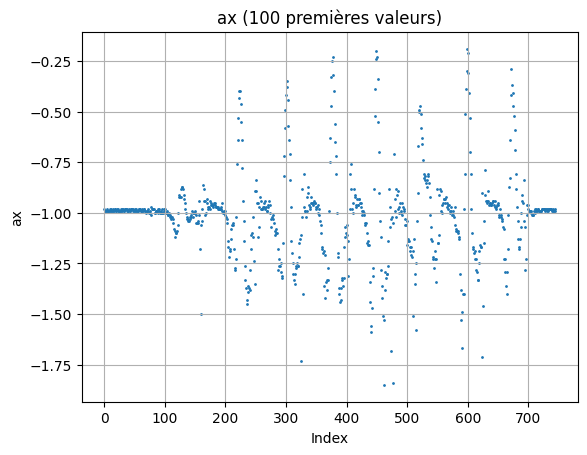

In [32]:
buffer_size = 100

plt.scatter(range(len(ax)), ax, marker='o', s=1)
plt.xlabel('Index')
plt.ylabel('ax')
plt.title(f'ax ({buffer_size} premières valeurs)')
plt.grid(True)
plt.show()

# Plot and Scatter fnc

In [79]:
import matplotlib.pyplot as plt

def draw_data(ax, x, start=0, end=None, label='x', title=None, marker='o', size=1, kind='scatter'):
    """
    Scatter plot x over time in a given axis.
    
    Parameters:
        ax : matplotlib axis object
        x : numpy array to plot
        start, end : interval of indices
        label : y-axis label
        title : subplot title
        marker : style of points
        size : size of points
    """
    if end is None:
        end = len(x)
    
    if kind == 'scatter':
        ax.scatter(range(end-start), x[start:end], marker=marker, s=size)
    elif kind == 'plot':
        ax.plot(range(end-start), x[start:end])
    else:
        raise ValueError("kind doit être 'scatter' ou 'plot'")
    
    ax.set_ylabel(label)
    if title is None:
        title = f'{label} ({end-start} valeurs)'
    ax.set_title(title)
    ax.grid(True)

def draw_data1(x, start=0, end=None, label='x', title=None, marker='o', size=1, kind='plot'):
    fig, ax = plt.subplots(figsize=(8, 4))
    draw_data(ax, x, start=start, end=end, label=label, title=title, marker=marker, size=size, kind=kind)
    ax.set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data2(x,y, start=0, end=None, label_x='x', label_y='y', size=1, kind='plot'):
    fig, axes = plt.subplots(2, 1, figsize=(15, 6))
    draw_data(axes[0], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[1], y, start=start, end=end, label=label_y, size=size, kind=kind)
    axes[1].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data3(x,y,z, start=0, end=None, label_x='x', label_y='y', label_z='z', size=1, kind='plot'):
    fig, axes = plt.subplots(3, 1, figsize=(15, 9))
    draw_data(axes[0], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[1], y, start=start, end=end, label=label_y, size=size, kind=kind)
    draw_data(axes[2], z, start=start, end=end, label=label_z, size=size, kind=kind)
    axes[2].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def draw_data4(w,x,y,z, start=0, end=None, label_w='w', label_x='x', label_y='y', label_z='z', size=1, kind='plot'):
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    draw_data(axes[0], w, start=start, end=end, label=label_w, size=size, kind=kind)
    draw_data(axes[1], x, start=start, end=end, label=label_x, size=size, kind=kind)
    draw_data(axes[2], y, start=start, end=end, label=label_y, size=size, kind=kind)
    draw_data(axes[3], z, start=start, end=end, label=label_z, size=size, kind=kind)
    axes[3].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

In [55]:
def compare_data(x, y, start=0, end=None, xlabel='x', ylabel='y', title=None, marker='o', size=1, kind='plot'):
    """
    Plot y versus x for a given interval.
    
    Parameters:
        x, y : numpy arrays to plot
        start : index de début (inclus)
        end : index de fin (exclus), None pour la fin du tableau
        xlabel, ylabel : labels des axes
        title : titre du graphique, None pour générer automatiquement
        marker : style des points
    """
    if end is None:
        end = len(x)

    plt.figure(figsize=(15, 6))

    if kind == 'plot':
        plt.plot(x[start:end], y[start:end], marker=marker)
    elif kind == 'scatter':
        plt.scatter(x[start:end], y[start:end], marker=marker, s=size)
    else:
        raise ValueError(f"Unknown kind: {kind}")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if title is None:
        title = f'{ylabel} en fonction de {xlabel} ({end-start} valeurs)'
    plt.title(title)
    
    plt.grid(True)
    plt.show()

# Acc/lin_acc et gyr/quaternion comparasions

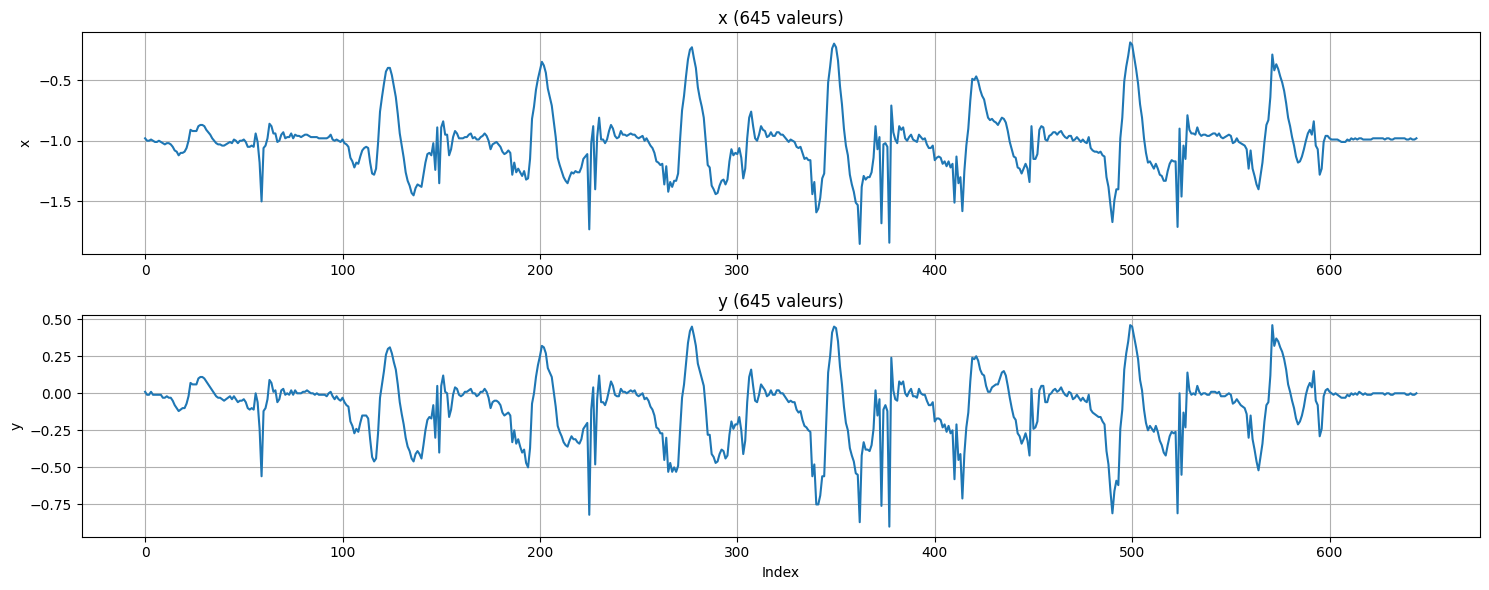

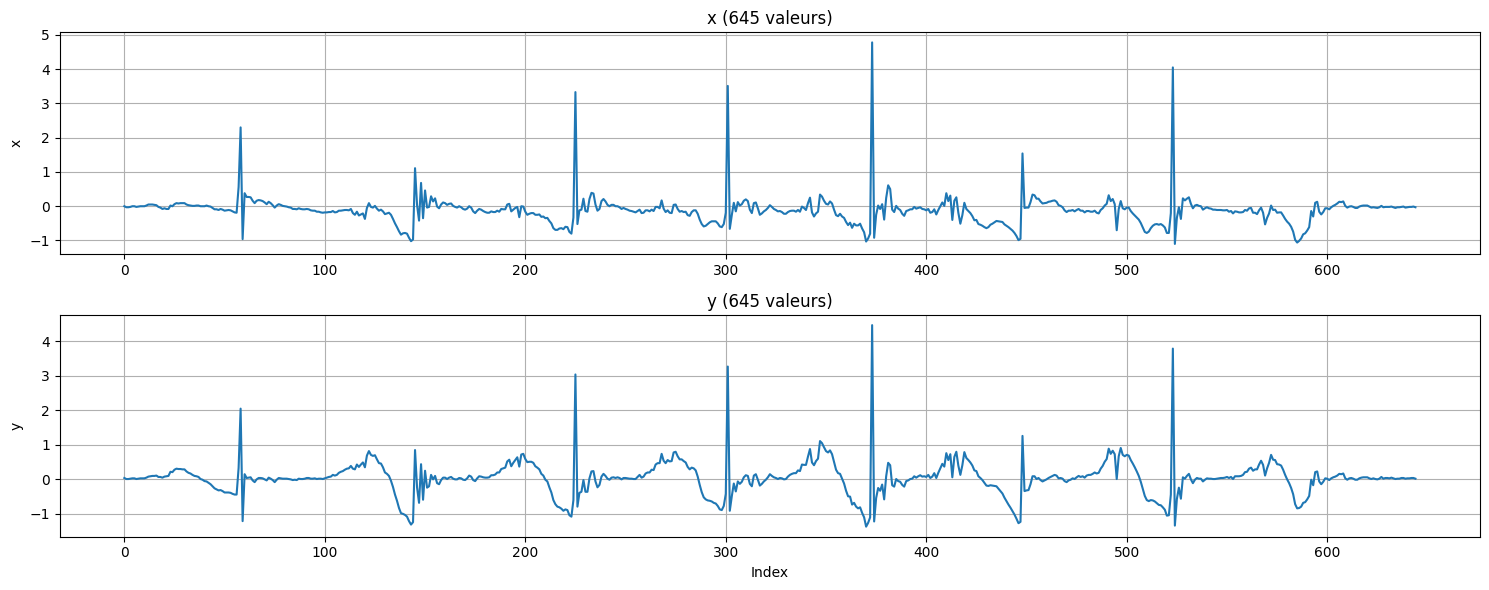

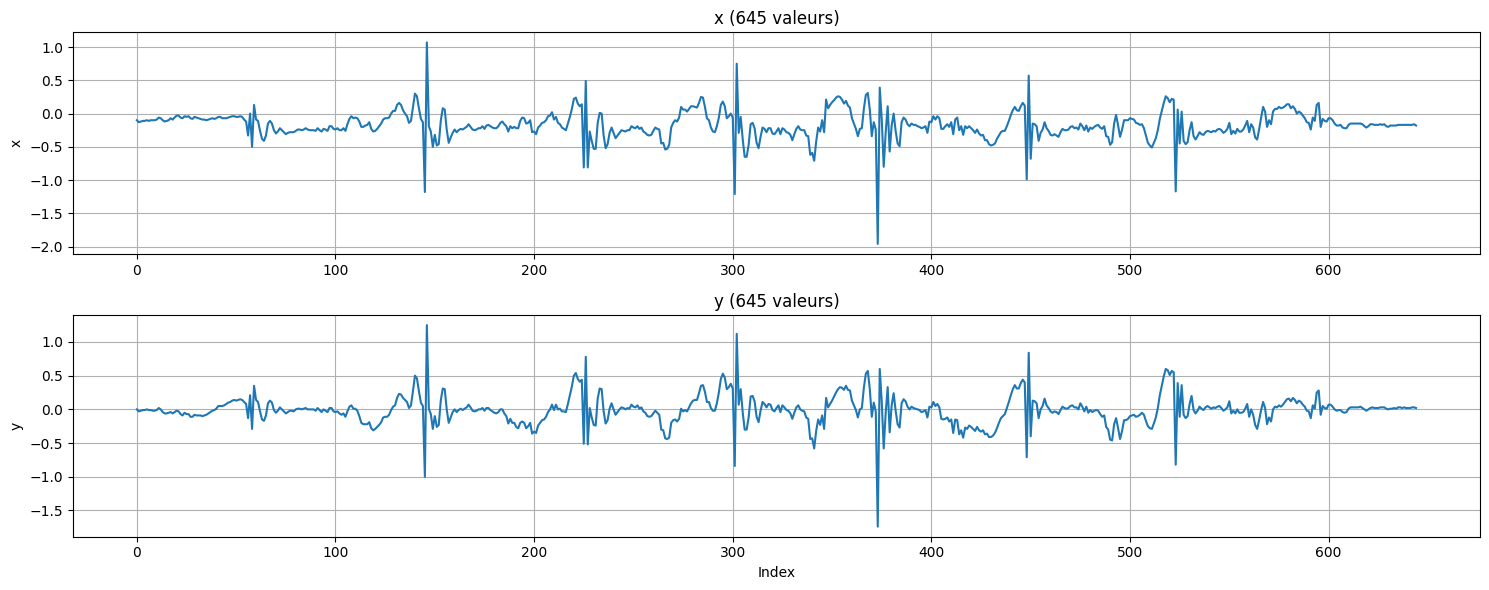

In [35]:
draw_data2(ax, lin_ax, start=100)
draw_data2(ay, lin_ay, start=100)
draw_data2(az, lin_az, start=100)

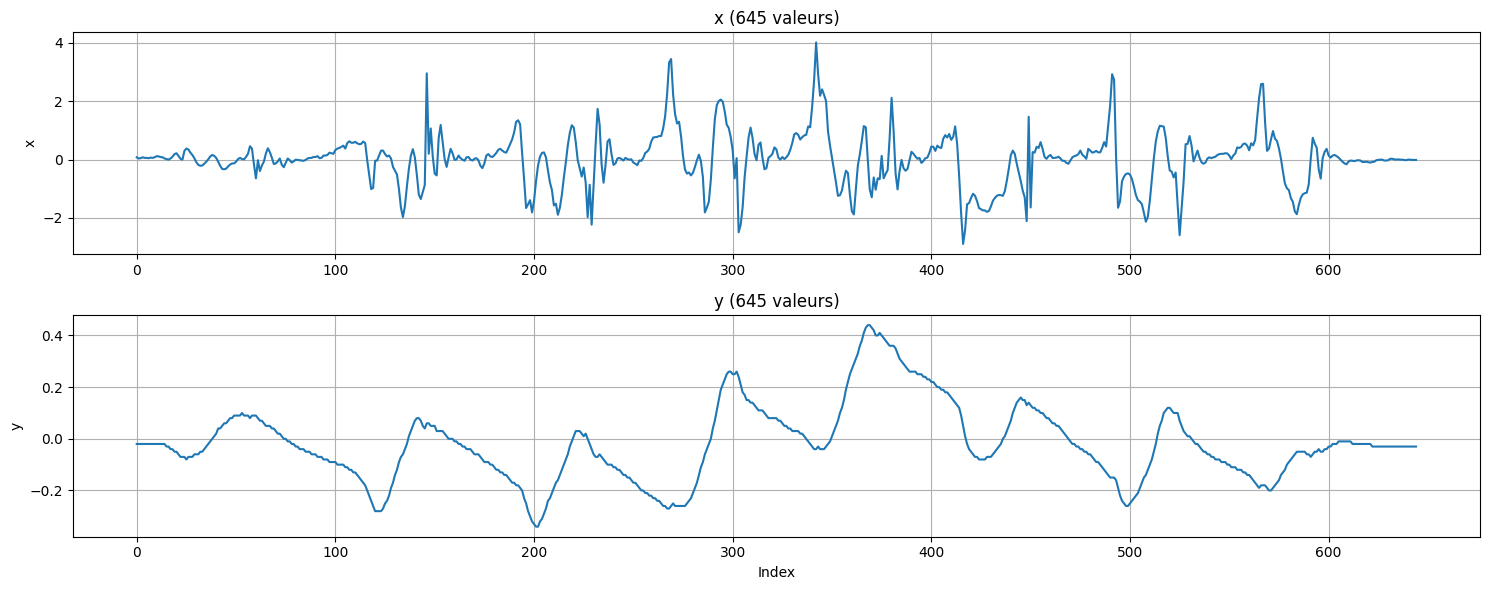

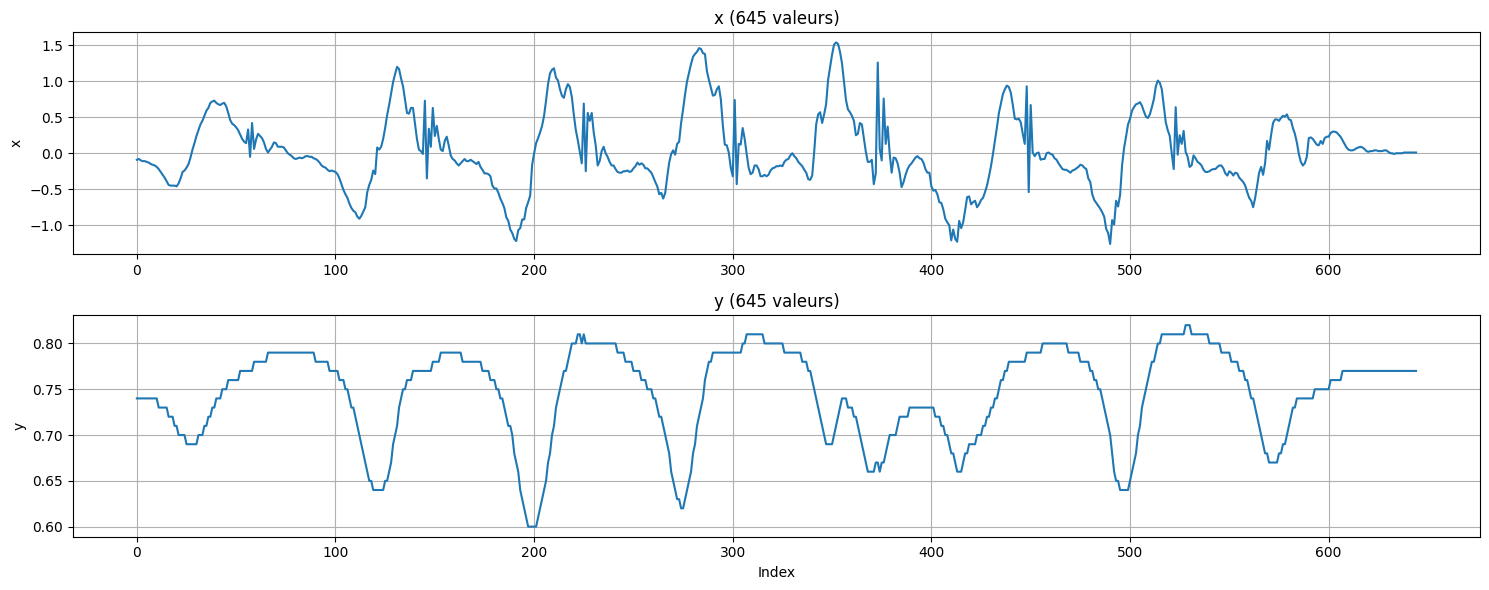

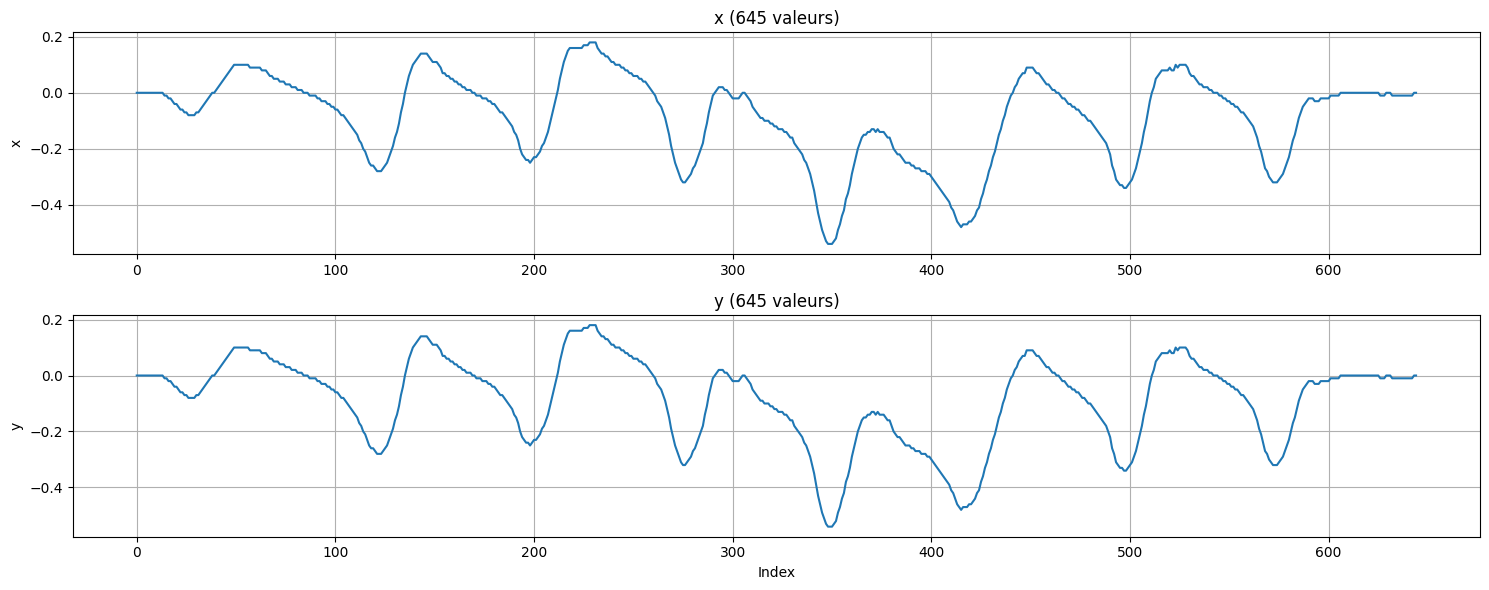

In [9]:
draw_data2(gx, qx, start=100)
draw_data2(gy, qy, start=100)
draw_data2(qz, qz, start=100)

# Integration fncs

In [44]:
def trapezoidal_integration(data_x, data_y, data_z, delta_t):
    """
    Integrate 3D data using trapezoidal rule.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of values to integrate
        delta_t : numpy array of time steps (same length as data arrays)
    
    Returns:
        integrated : numpy array of shape (N, 3) with integrated values for x, y, z
    """
    N = len(data_x)
    integrated = np.zeros((N, 3))
    
    for i in range(1, N):
        integrated[i, 0] = integrated[i-1, 0] + 0.5 * (data_x[i] + data_x[i-1]) * delta_t[i]
        integrated[i, 1] = integrated[i-1, 1] + 0.5 * (data_y[i] + data_y[i-1]) * delta_t[i]
        integrated[i, 2] = integrated[i-1, 2] + 0.5 * (data_z[i] + data_z[i-1]) * delta_t[i]

    return integrated


In [45]:
def euler_integration(data_x, data_y, data_z, delta_t):
    """
    Integrate 3D data using simple Euler method.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of values to integrate
        delta_t : numpy array of time steps (same length as data arrays)
    
    Returns:
        integrated : numpy array of shape (N, 3) with integrated values for x, y, z
    """
    N = len(data_x)
    integrated = np.zeros((N, 3))
    
    for i in range(1, N):
        dt = delta_t[i]
        integrated[i, 0] = integrated[i-1, 0] + data_x[i-1] * dt
        integrated[i, 1] = integrated[i-1, 1] + data_y[i-1] * dt
        integrated[i, 2] = integrated[i-1, 2] + data_z[i-1] * dt
    
    return integrated

# Velocity calculations

In [46]:
tra_vx, tra_vy, tra_vz = trapezoidal_integration(ax, ay, az, delta_t).T
lin_tra_vx, lin_tra_vy, lin_tra_vz = trapezoidal_integration(lin_ax, lin_ay, lin_az, delta_t).T

euler_vx, euler_vy, euler_vz = euler_integration(ax, ay, az, delta_t).T
lin_euler_vx, lin_euler_vy, lin_euler_vz = euler_integration(lin_ax, lin_ay, lin_az, delta_t).T

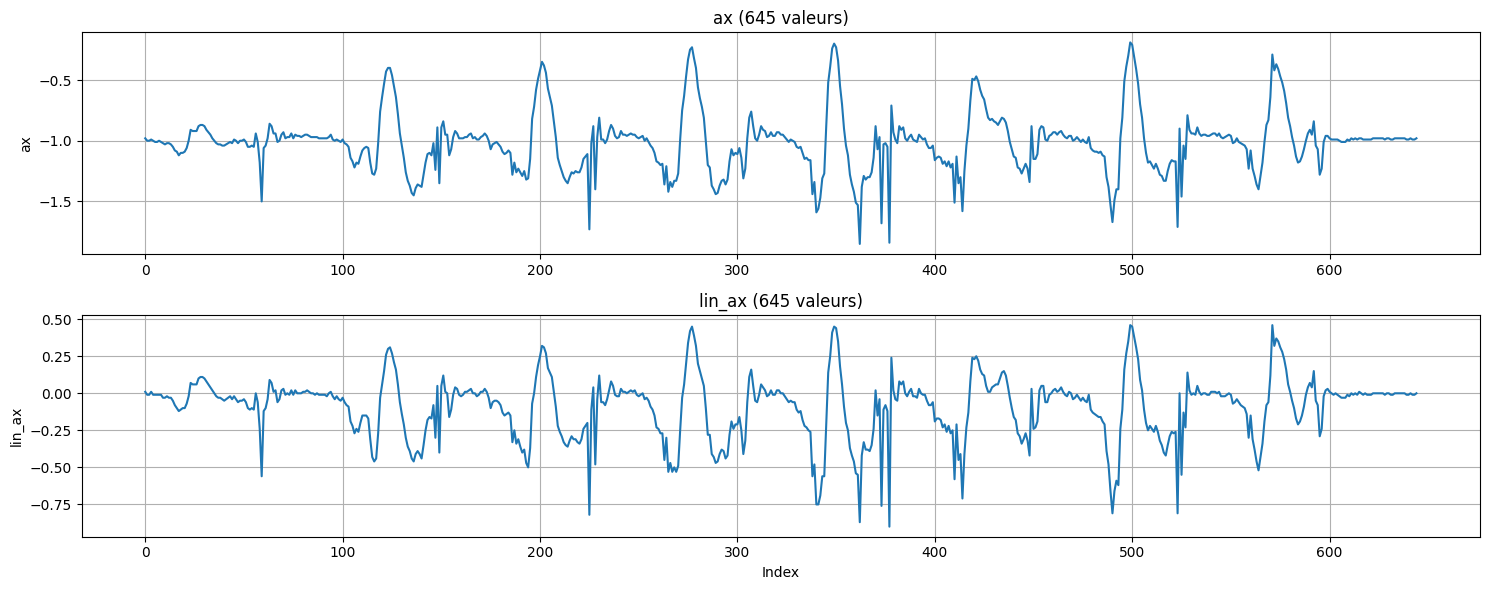

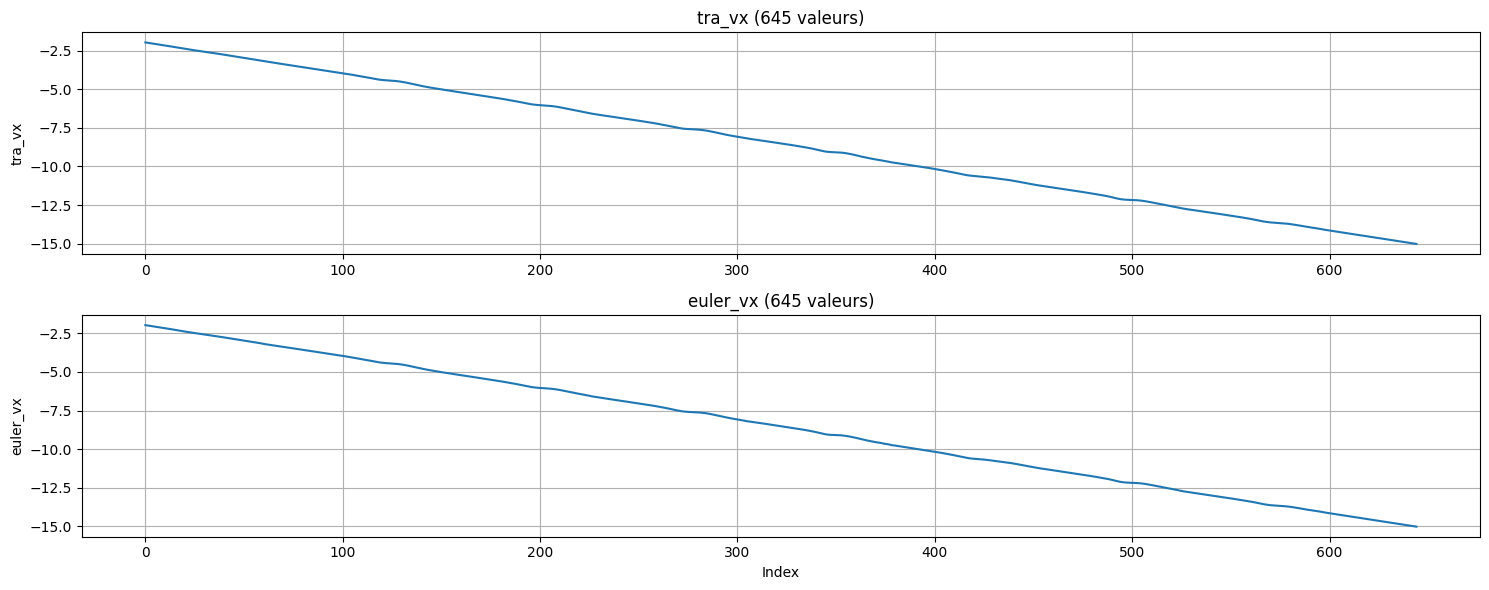

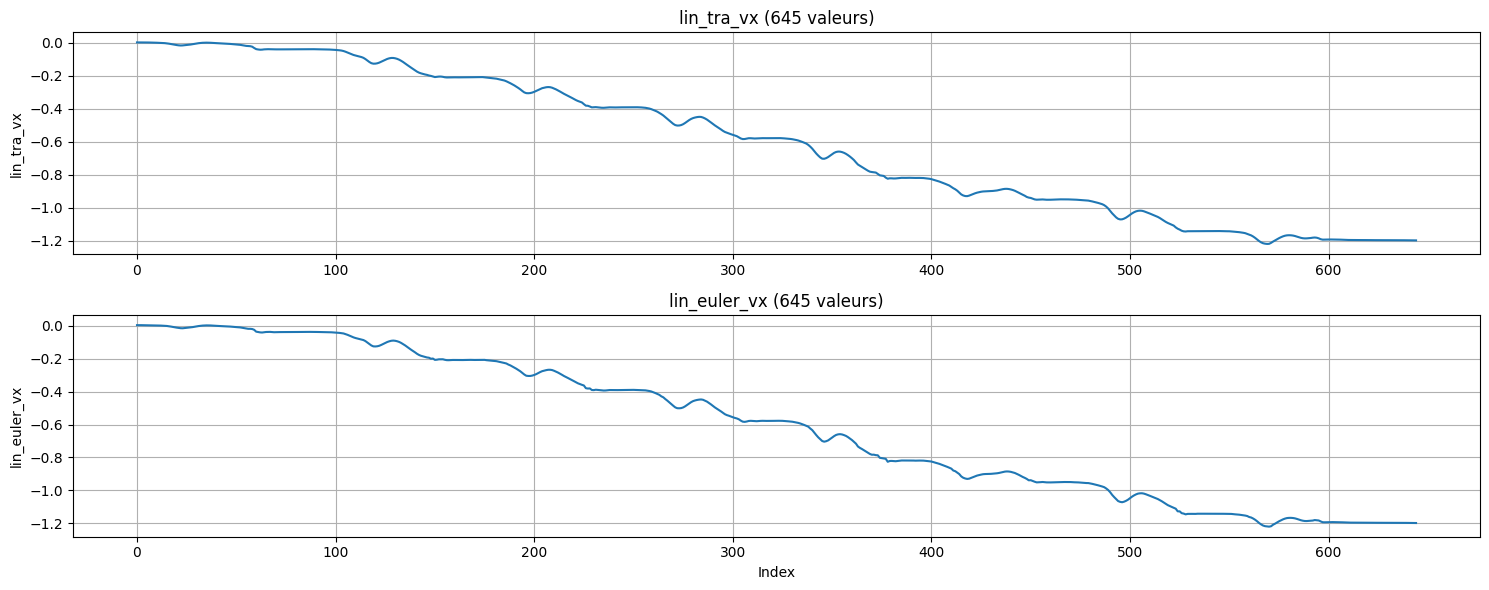

In [47]:

s=100
e=max
draw_data2(ax, lin_ax, start=s, end=e, label_x='ax', label_y='lin_ax')
draw_data2(tra_vx, euler_vx, start=s, end=e, label_x='tra_vx', label_y='euler_vx')
draw_data2(lin_tra_vx, lin_euler_vx, start=s, end=e, label_x='lin_tra_vx', label_y='lin_euler_vx')

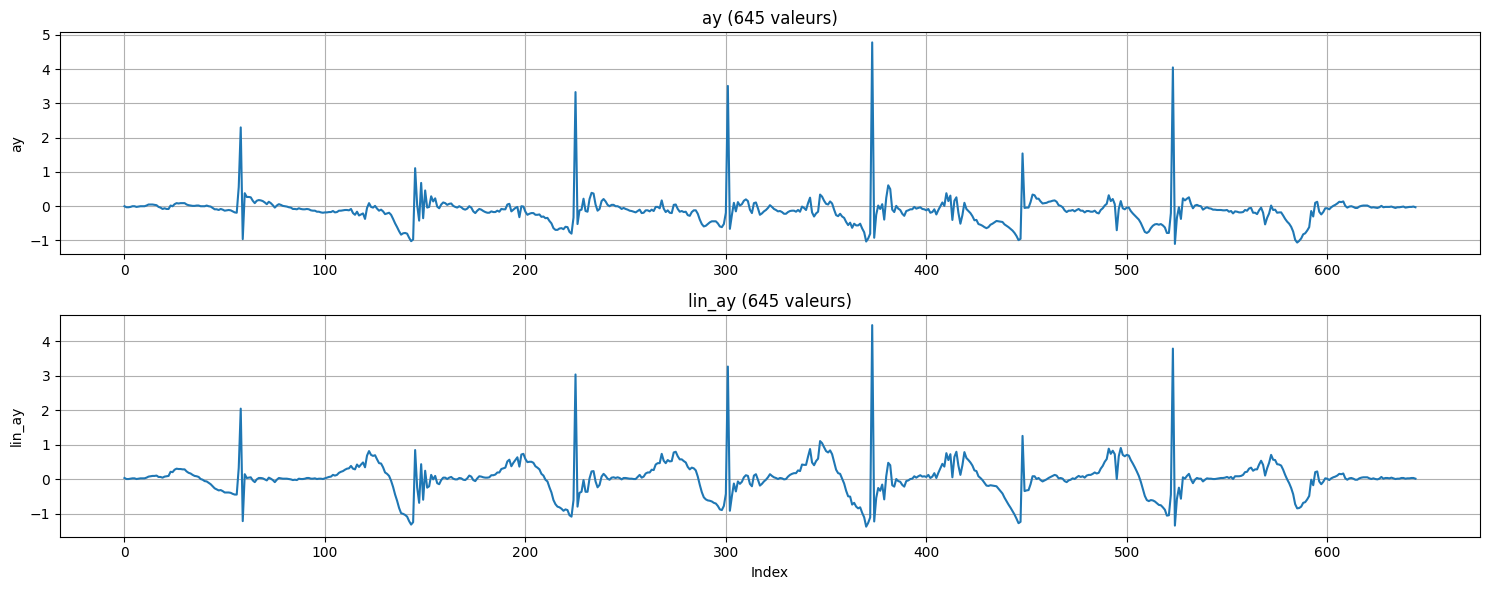

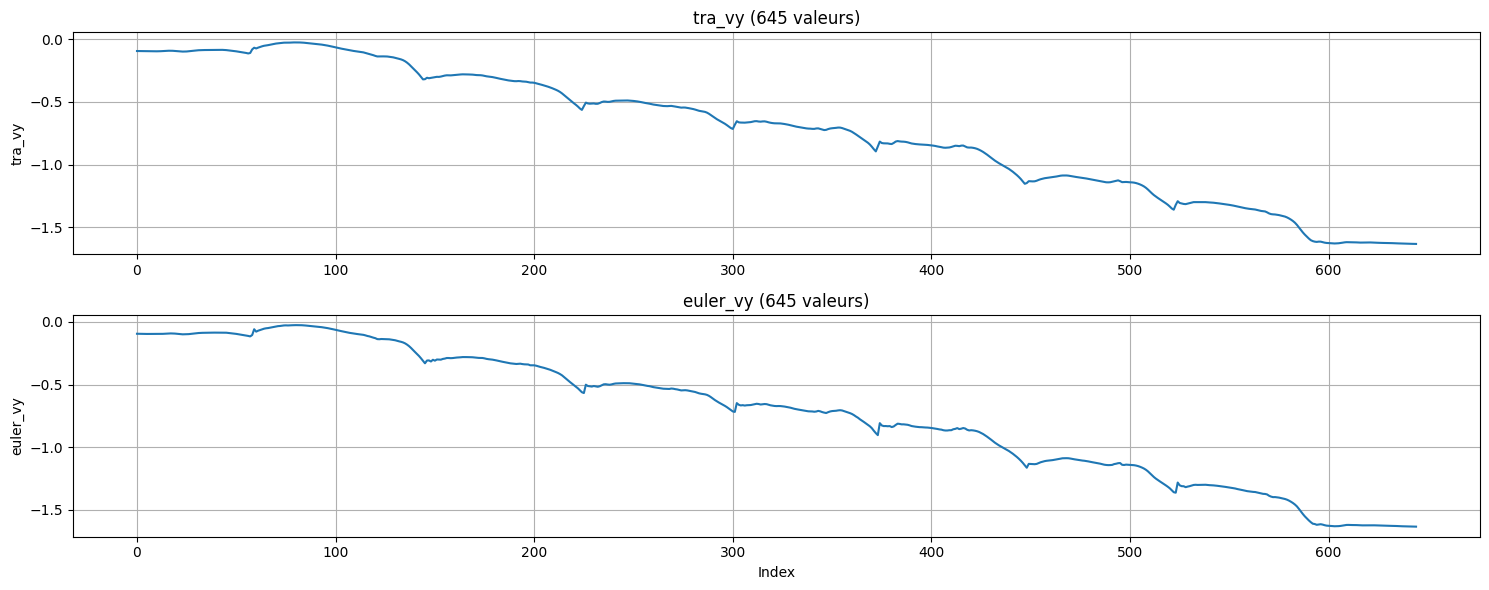

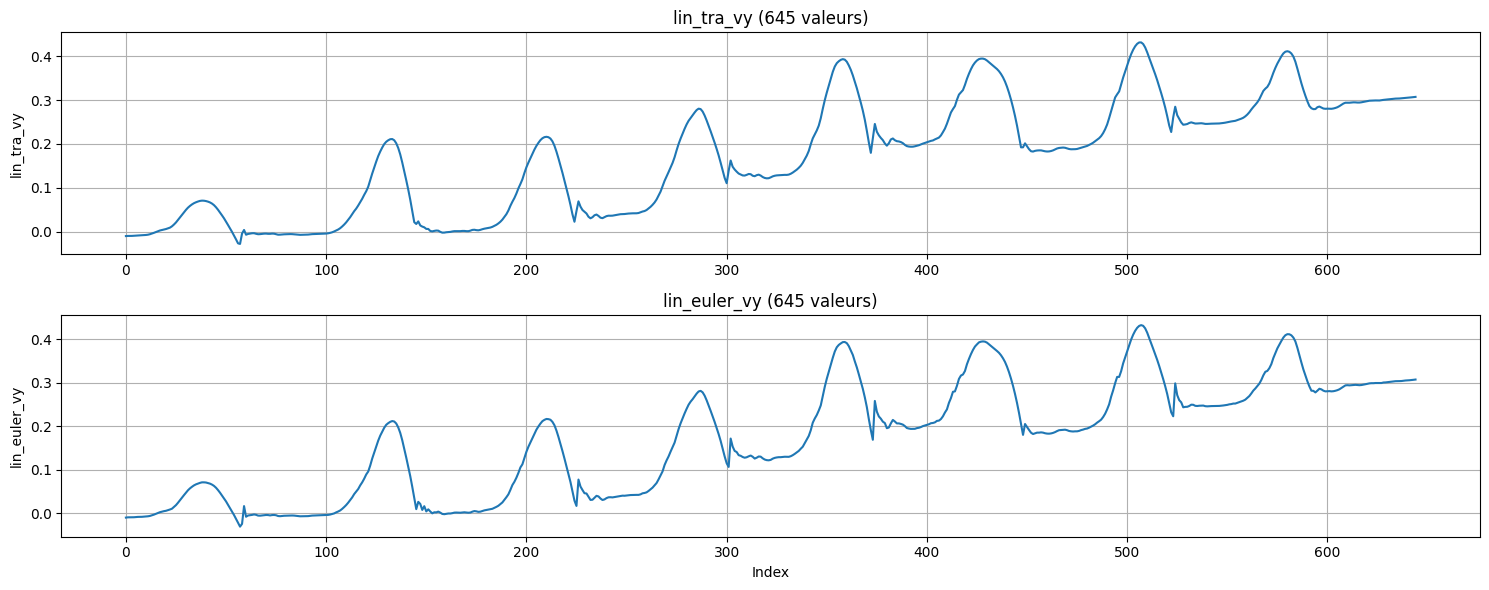

In [48]:
draw_data2(ay, lin_ay, start=s, end=e, label_x='ay', label_y='lin_ay')
draw_data2(tra_vy, euler_vy, start=s, end=e, label_x='tra_vy', label_y='euler_vy')
draw_data2(lin_tra_vy, lin_euler_vy, start=s, end=e, label_x='lin_tra_vy', label_y='lin_euler_vy')

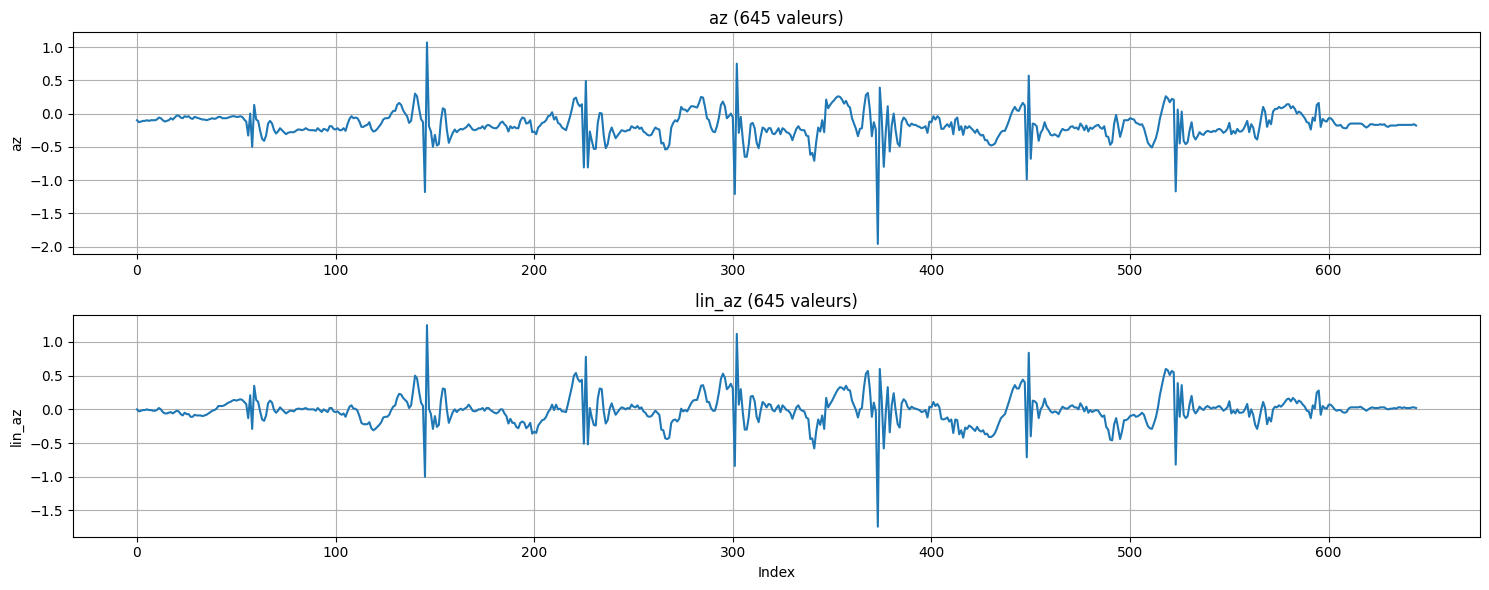

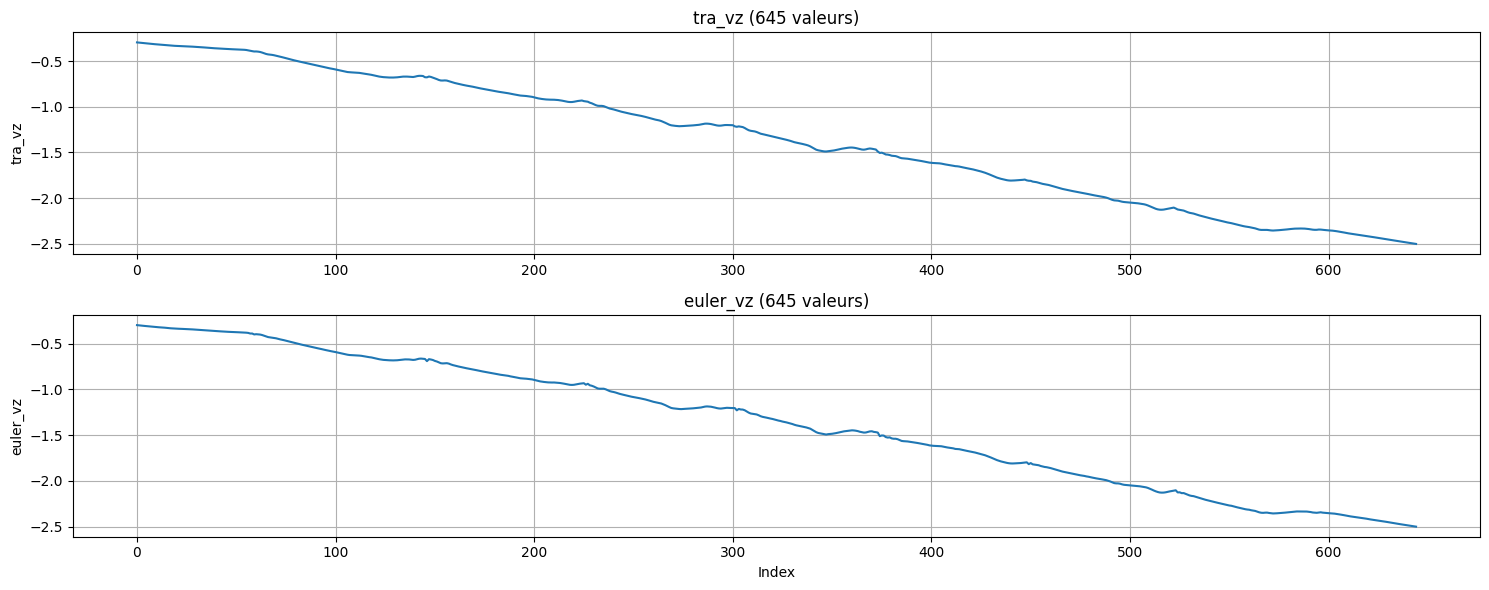

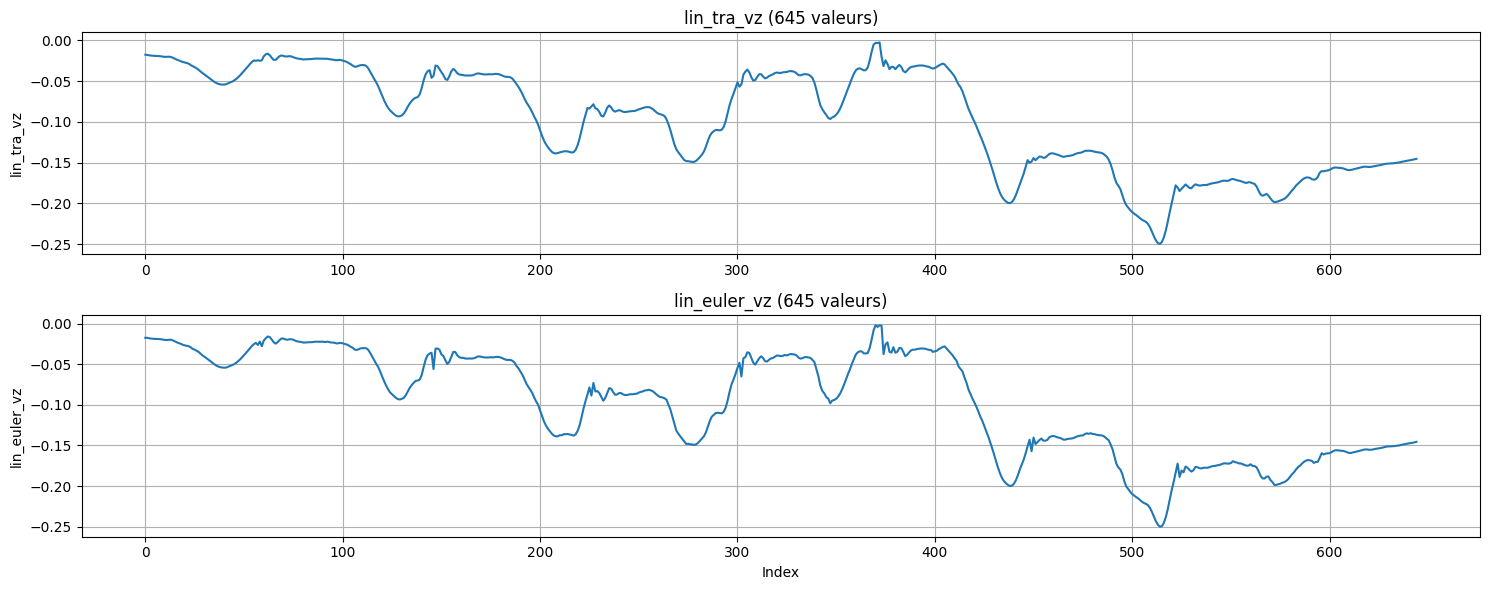

In [49]:
draw_data2(az, lin_az, start=s, end=e, label_x='az', label_y='lin_az')
draw_data2(tra_vz, euler_vz, start=s, end=e, label_x='tra_vz', label_y='euler_vz')
draw_data2(lin_tra_vz, lin_euler_vz, start=s, end=e, label_x='lin_tra_vz', label_y='lin_euler_vz')

entre trapezoidal et euler, il n'y a pas une grande différence
/
mais trapezoidal semble un peu plus lisse et moins de fluctuations

# Positions calculations

In [18]:
tra_px, tra_py, tra_pz = trapezoidal_integration(tra_vx, tra_vy, tra_vz, delta_t).T
lin_tra_px, lin_tra_py, lin_tra_pz = trapezoidal_integration(lin_tra_vx, lin_tra_vy, lin_tra_vz, delta_t).T

euler_px, euler_py, euler_pz = euler_integration(euler_vx, euler_vy, euler_vz, delta_t).T
lin_euler_px, lin_euler_py, lin_euler_pz = euler_integration(lin_euler_vx, lin_euler_vy, lin_euler_vz, delta_t).T

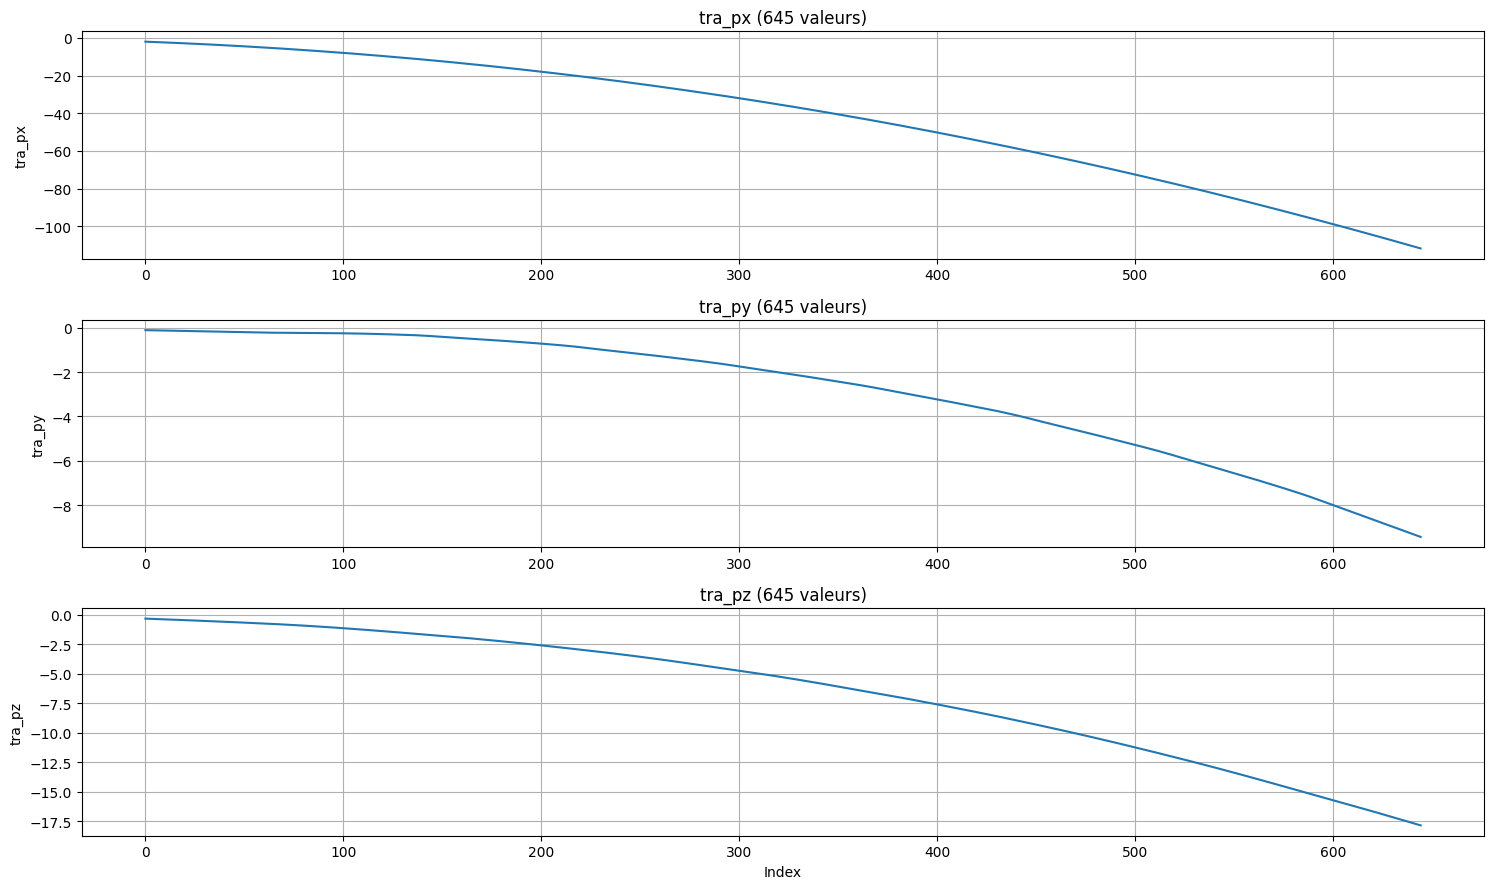

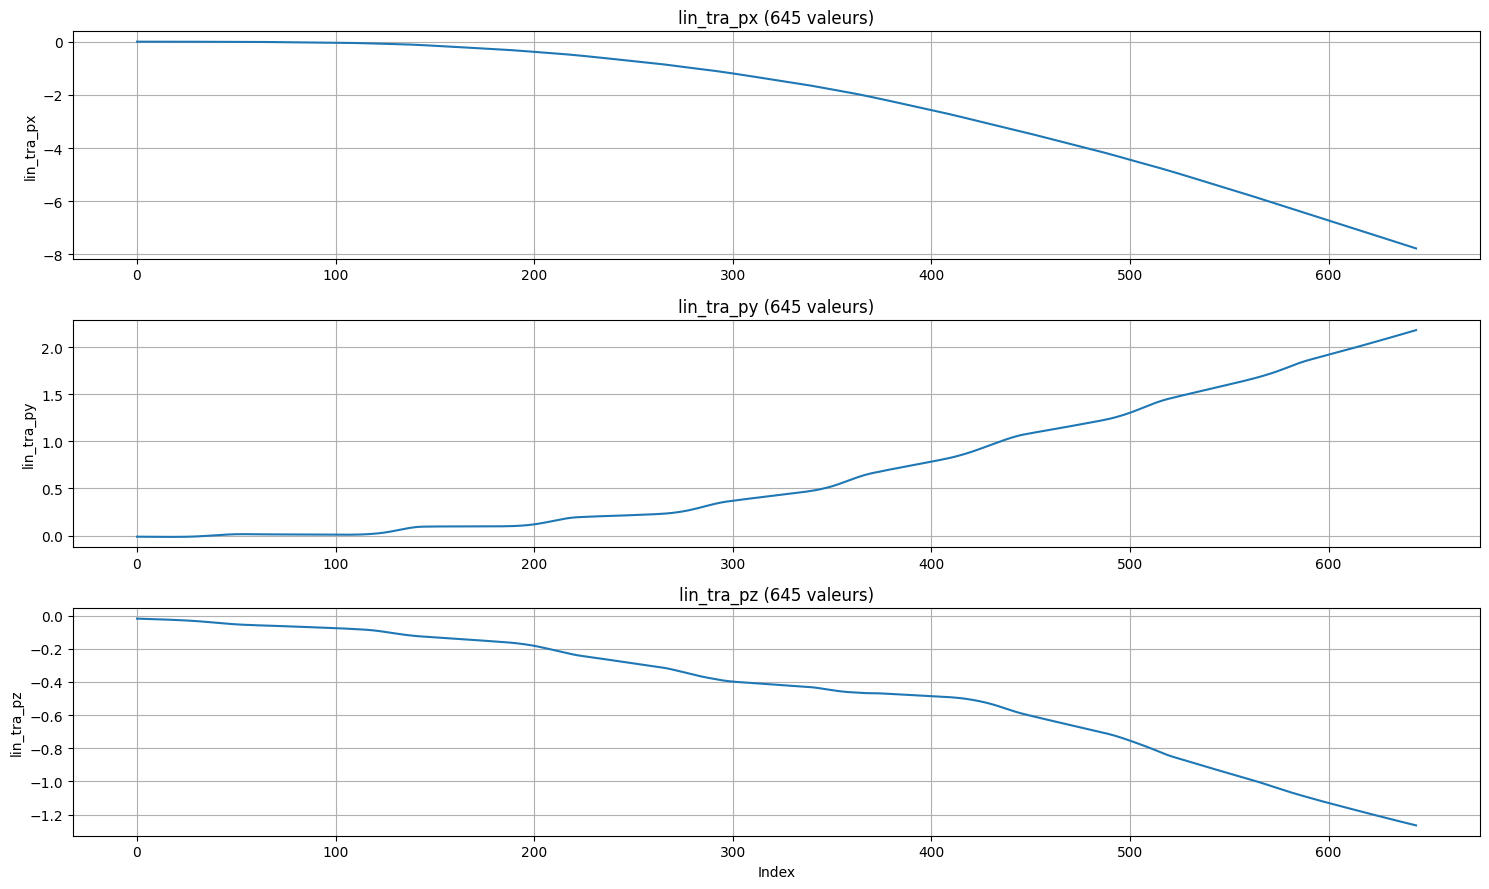

In [52]:
draw_data3(tra_px, tra_py, tra_pz, start=s, end=e, label_x='tra_px', label_y='tra_py', label_z='tra_pz')
draw_data3(lin_tra_px, lin_tra_py, lin_tra_pz, start=s, end=e, label_x='lin_tra_px', label_y='lin_tra_py', label_z='lin_tra_pz')

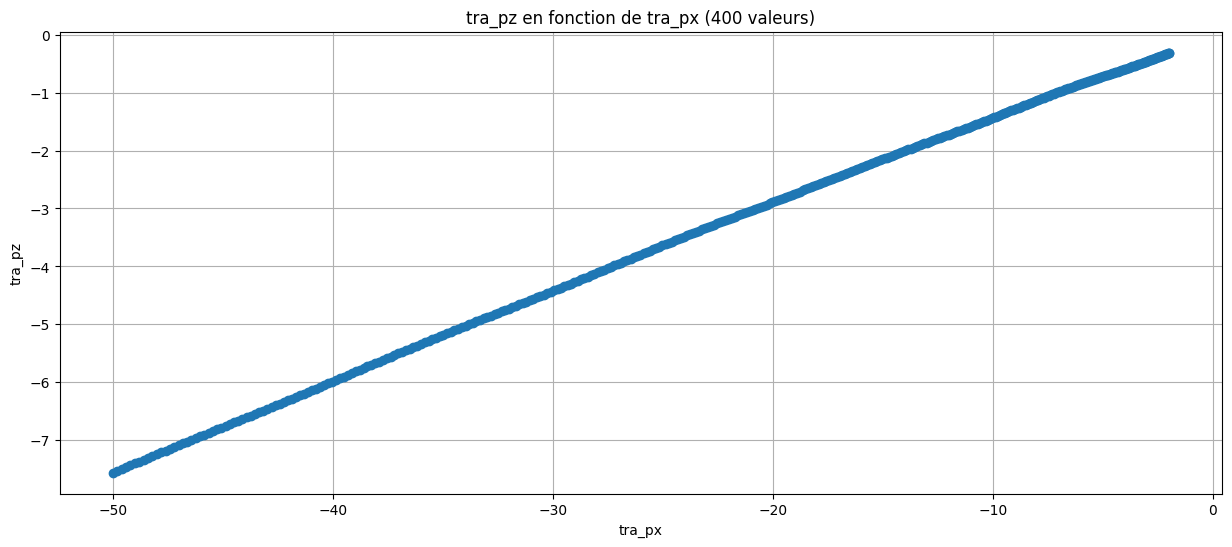

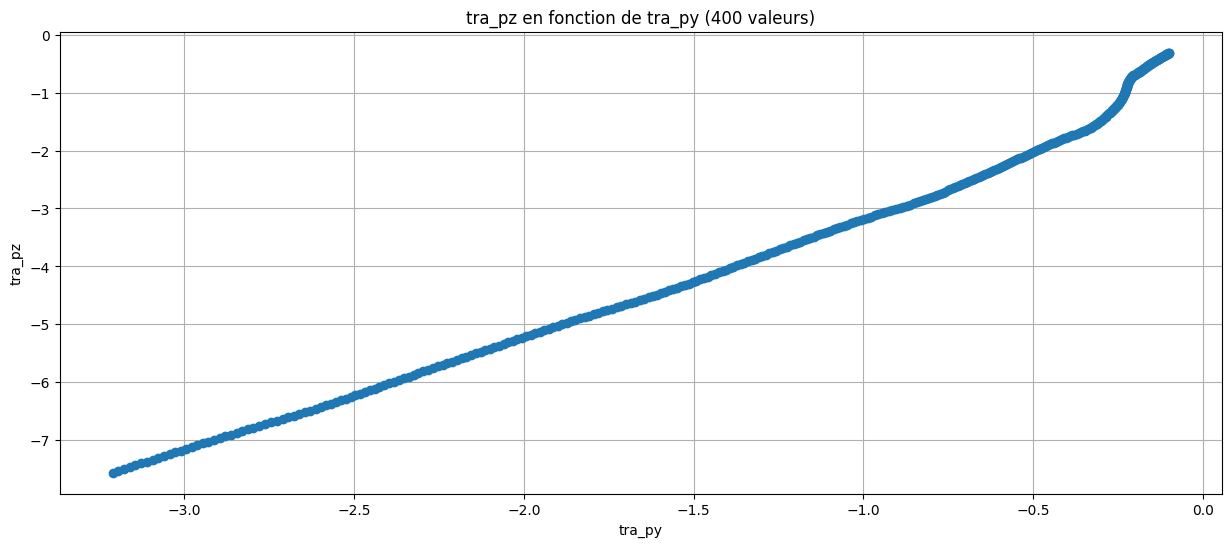

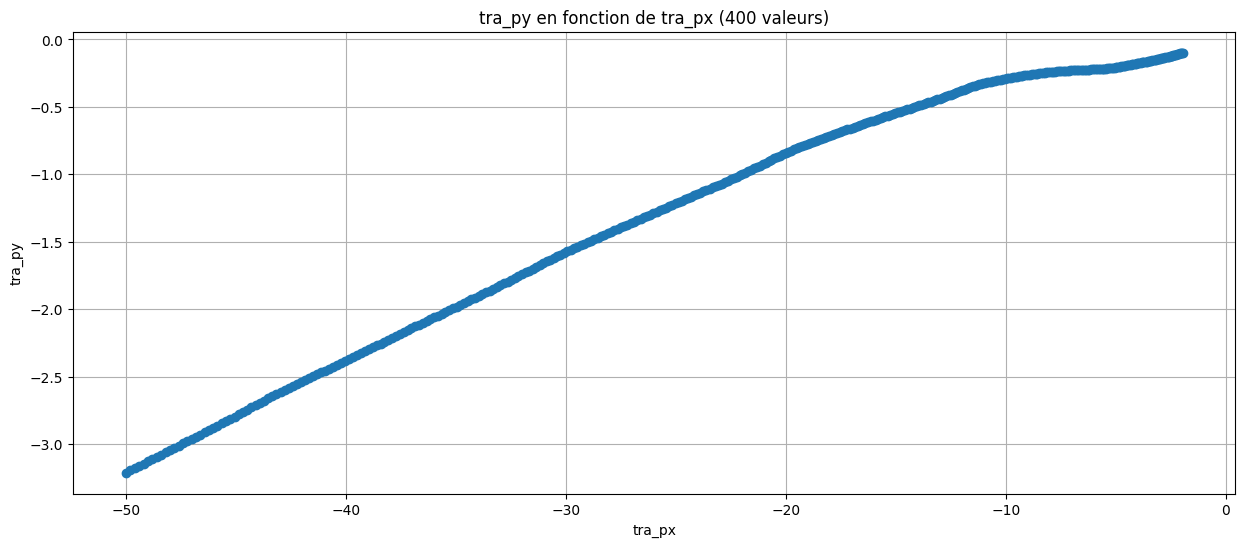

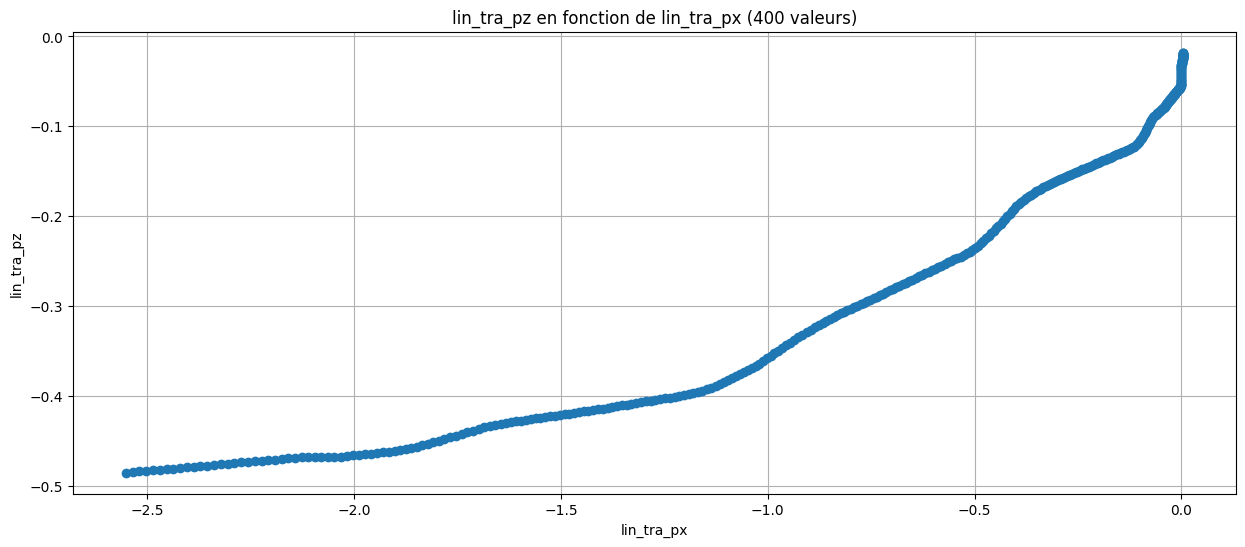

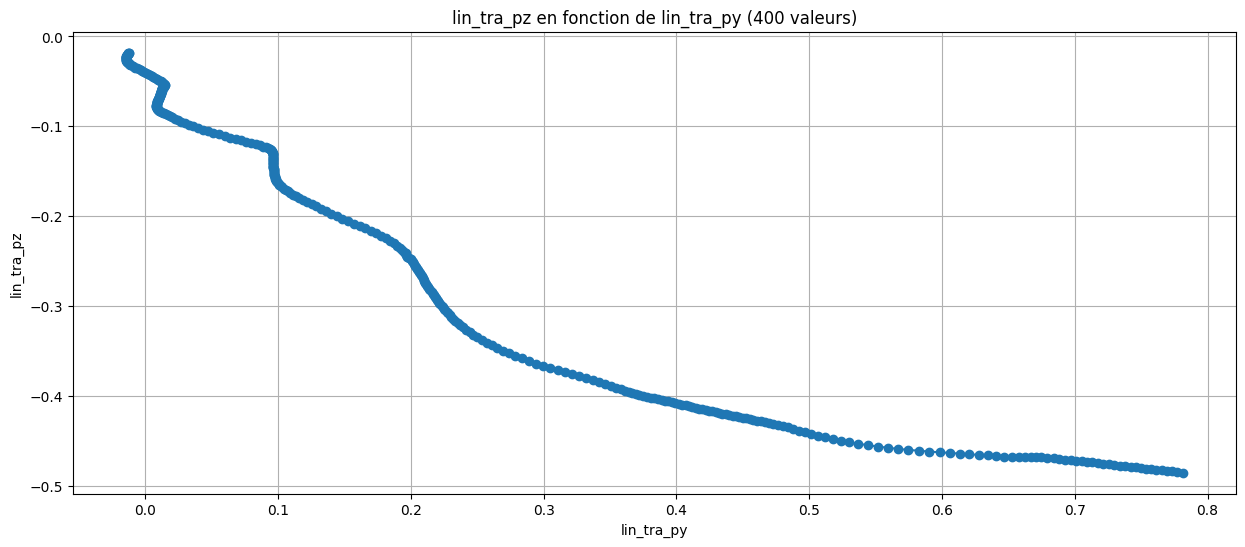

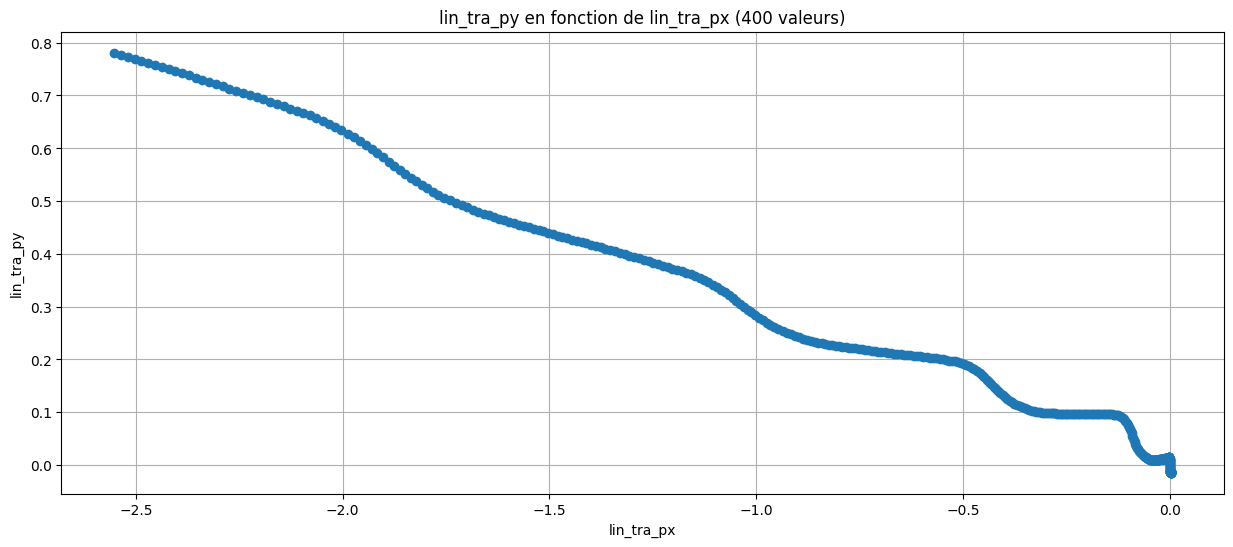

In [59]:

e = 100
s = 500
compare_data(tra_px, tra_pz, start=e, end=s, xlabel='tra_px', ylabel='tra_pz')
compare_data(tra_py, tra_pz, start=e, end=s, xlabel='tra_py', ylabel='tra_pz')
compare_data(tra_px, tra_py, start=e, end=s, xlabel='tra_px', ylabel='tra_py')
compare_data(lin_tra_px, lin_tra_pz, start=e, end=s, xlabel='lin_tra_px', ylabel='lin_tra_pz')
compare_data(lin_tra_py, lin_tra_pz, start=e, end=s, xlabel='lin_tra_py', ylabel='lin_tra_pz')
compare_data(lin_tra_px, lin_tra_py, start=e, end=s, xlabel='lin_tra_px', ylabel='lin_tra_py')

# HP filters

In [60]:
import numpy as np
from scipy.signal import butter, filtfilt

def high_pass_filter_scipy(data_x, data_y, data_z, cutoff, sample_period, order=1):
    """
    Apply a high-pass Butterworth filter on 3D data.
    
    Parameters:
        data_x, data_y, data_z : numpy arrays of input data
        cutoff : cutoff frequency in Hz
        sample_period : time between samples in seconds
        order : filter order (default 1)
    
    Returns:
        filtered_x, filtered_y, filtered_z : filtered numpy arrays
    """
    fs = 1 / sample_period  # sampling frequency
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    
    filtered_x = filtfilt(b, a, data_x)
    filtered_y = filtfilt(b, a, data_y)
    filtered_z = filtfilt(b, a, data_z)
    
    return filtered_x, filtered_y, filtered_z


In [61]:
import numpy as np

def high_pass_filter_iir(x, y, z, alpha):
    """
    Simple high-pass filter for 3D data, using difference equation
    like it can be done on Nicla Sense ME.
    
    Parameters:
        x, y, z : numpy arrays of input data
        alpha : filter coefficient between 0 and 1 (smaller = plus de filtrage)
    
    Returns:
        x_hp, y_hp, z_hp : filtered arrays
    """
    x_hp = np.zeros_like(x)
    y_hp = np.zeros_like(y)
    z_hp = np.zeros_like(z)
    
    for i in range(1, len(x)):
        x_hp[i] = alpha * (x_hp[i-1] + x[i] - x[i-1])
        y_hp[i] = alpha * (y_hp[i-1] + y[i] - y[i-1])
        z_hp[i] = alpha * (z_hp[i-1] + z[i] - z[i-1])
    
    return x_hp, y_hp, z_hp


# scipy : V and pos calculations 

In [66]:
scipy_tra_vx, scipy_tra_vy, scipy_tra_vz = high_pass_filter_scipy(tra_vx, tra_vy, tra_vz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)
lin_scipy_tra_vx, lin_scipy_tra_vy, lin_scipy_tra_vz = high_pass_filter_scipy(lin_tra_vx, lin_tra_vy, lin_tra_vz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)

scipy_tra_px, scipy_tra_py, scipy_tra_pz = trapezoidal_integration(scipy_tra_vx, scipy_tra_vy, scipy_tra_vz, delta_t).T
lin_scipy_tra_px, lin_scipy_tra_py, lin_scipy_tra_pz = trapezoidal_integration(lin_scipy_tra_vx, lin_scipy_tra_vy, lin_scipy_tra_vz, delta_t).T

scipy2_tra_px, scipy2_tra_py, scipy2_tra_pz = high_pass_filter_scipy(scipy_tra_px, scipy_tra_py, scipy_tra_pz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)
lin_scipy2_tra_px, lin_scipy2_tra_py, lin_scipy2_tra_pz = high_pass_filter_scipy(lin_scipy_tra_px, lin_scipy_tra_py, lin_scipy_tra_pz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)

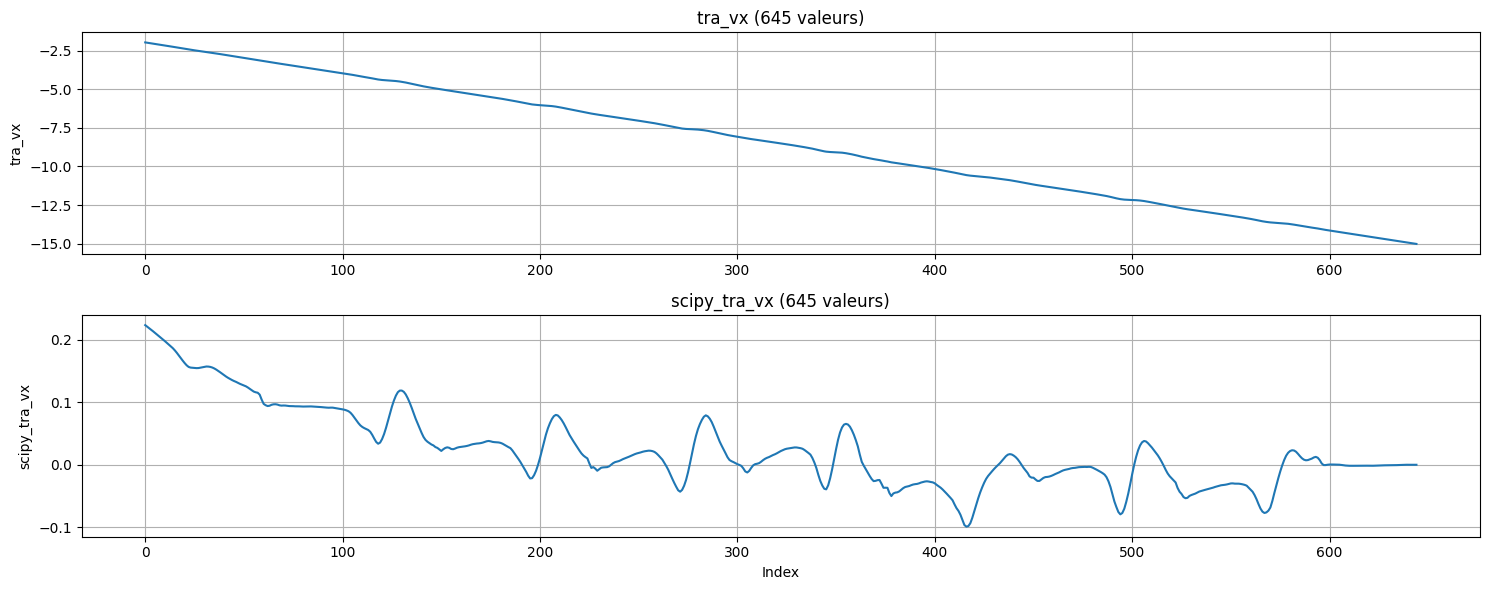

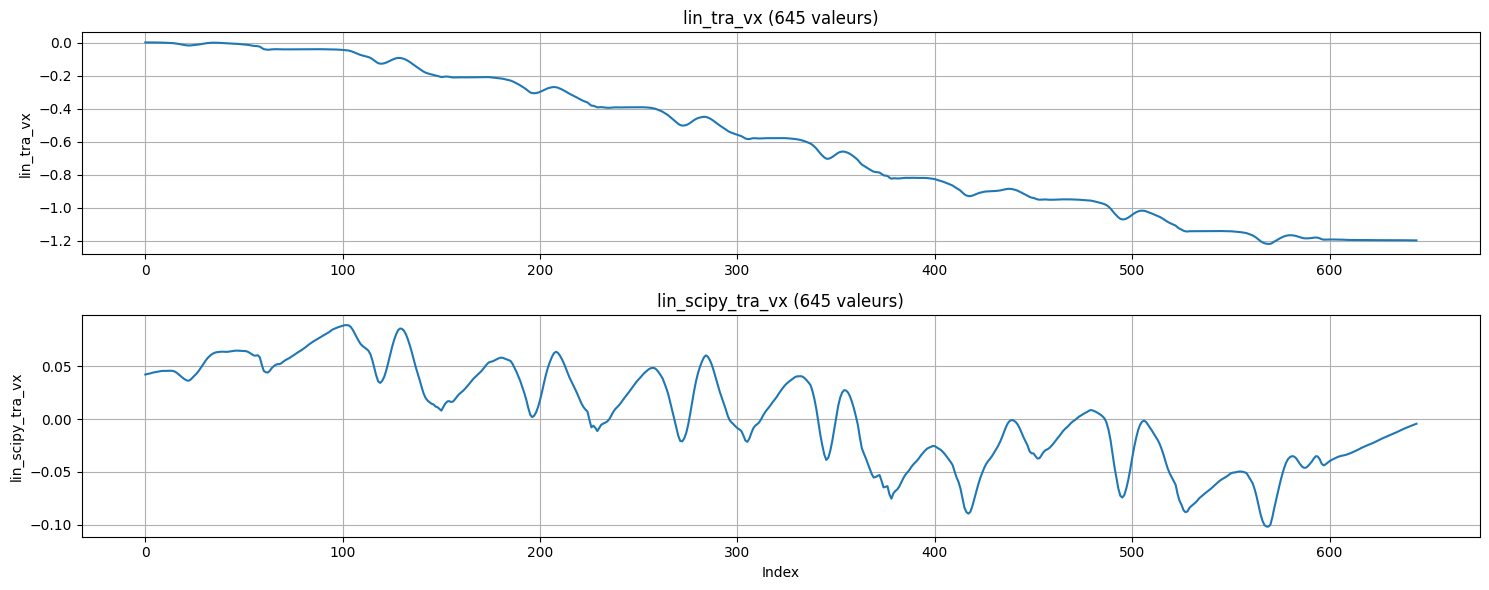

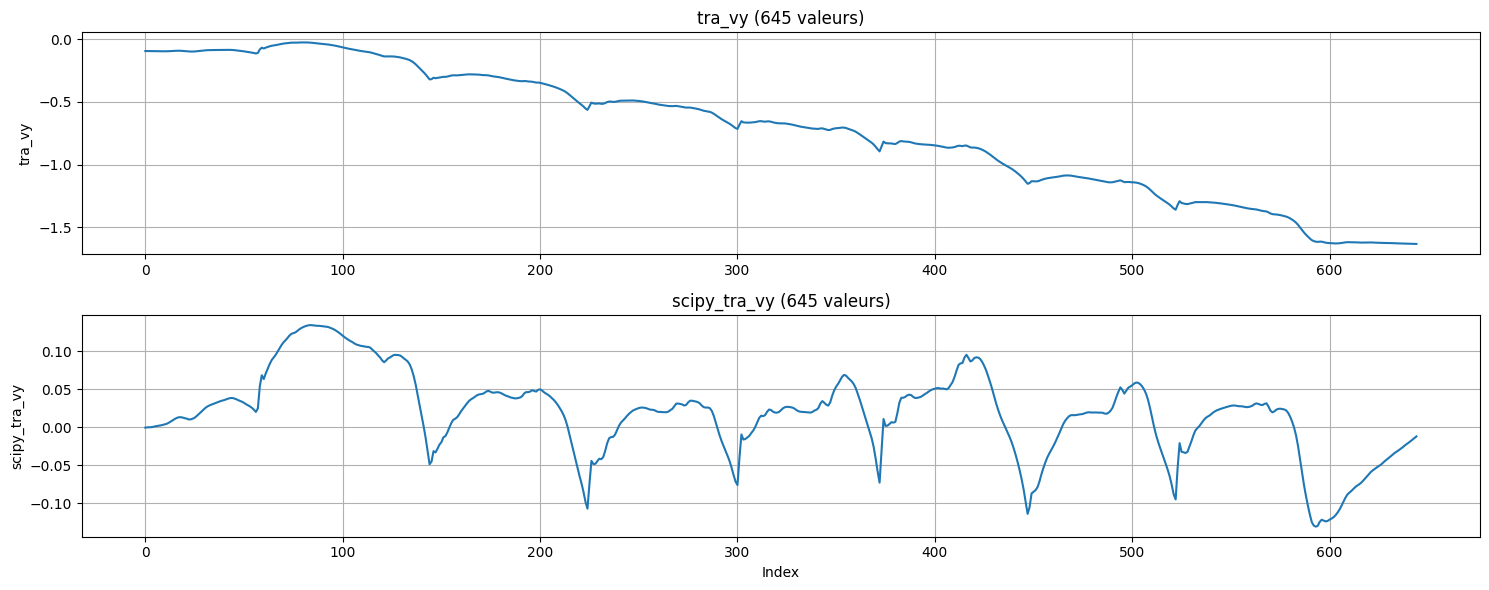

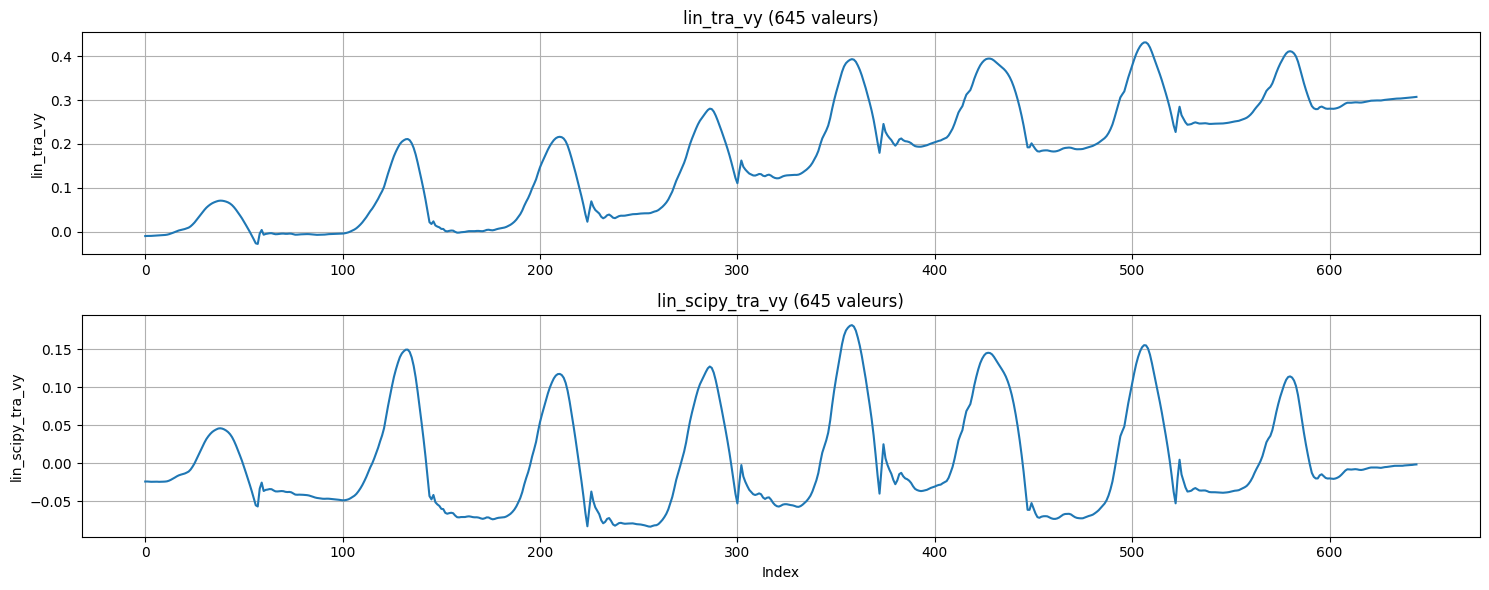

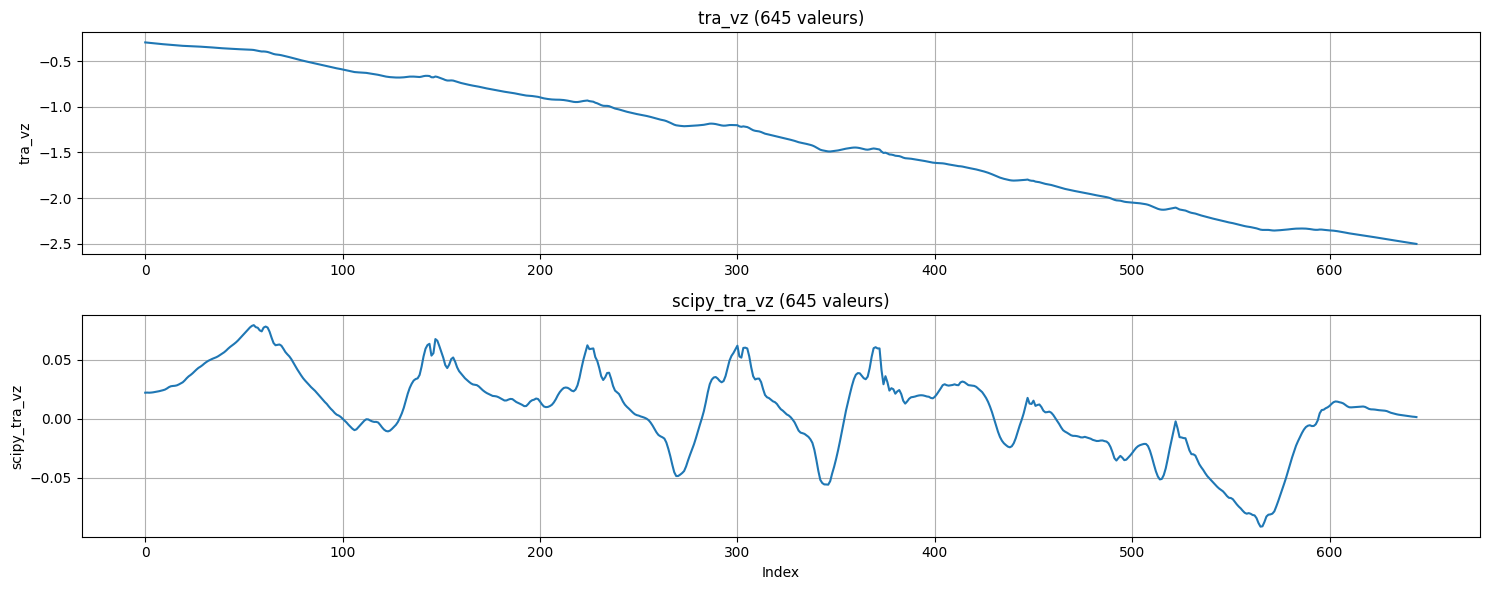

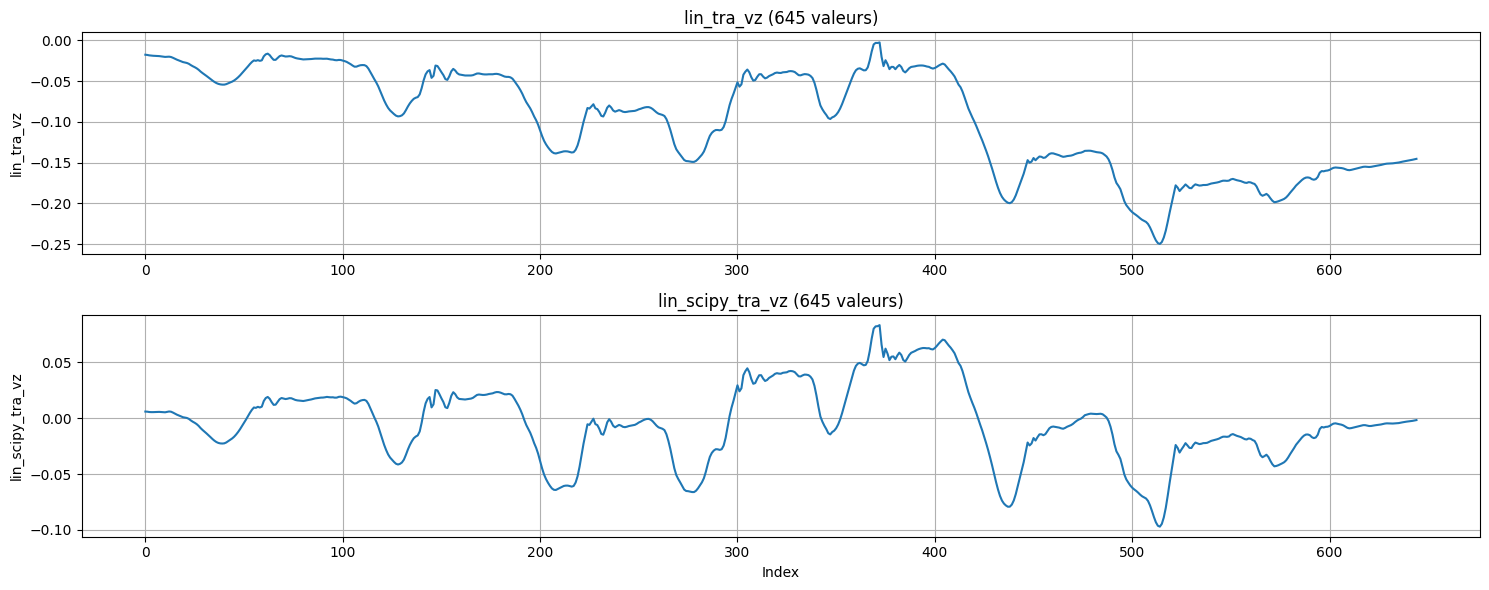

In [69]:
s=100
e=max
#vx:
draw_data2(tra_vx, scipy_tra_vx, start=s, end=e, label_x='tra_vx', label_y='scipy_tra_vx')
draw_data2(lin_tra_vx, lin_scipy_tra_vx, start=s, end=e, label_x='lin_tra_vx', label_y='lin_scipy_tra_vx')
#vy:
draw_data2(tra_vy, scipy_tra_vy, start=s, end=e, label_x='tra_vy', label_y='scipy_tra_vy')
draw_data2(lin_tra_vy, lin_scipy_tra_vy, start=s, end=e, label_x='lin_tra_vy', label_y='lin_scipy_tra_vy')
#vz:
draw_data2(tra_vz, scipy_tra_vz, start=s, end=e, label_x='tra_vz', label_y='scipy_tra_vz')
draw_data2(lin_tra_vz, lin_scipy_tra_vz, start=s, end=e, label_x='lin_tra_vz', label_y='lin_scipy_tra_vz')

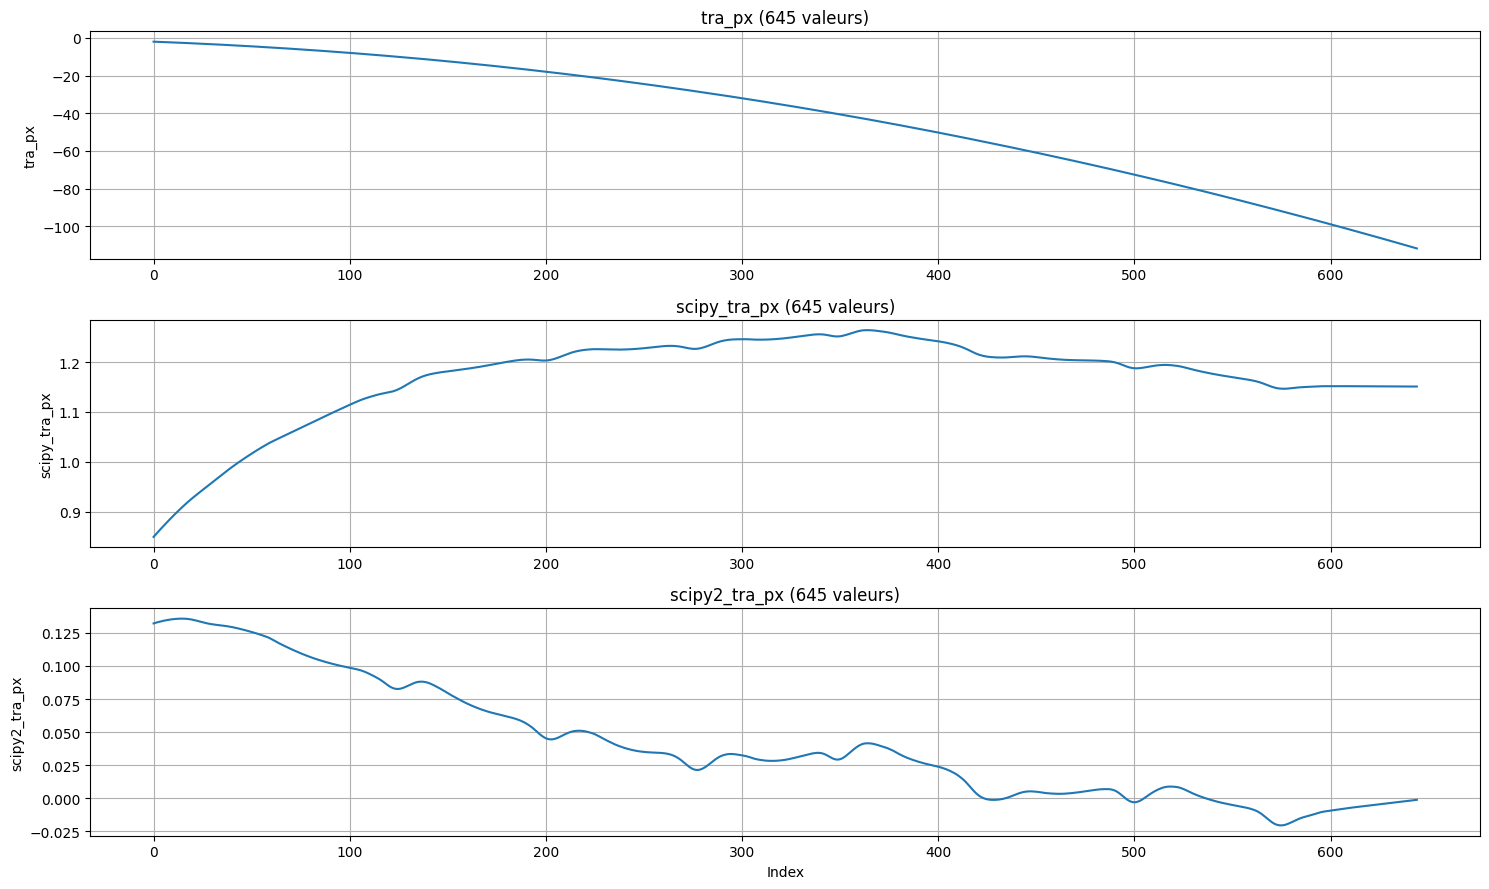

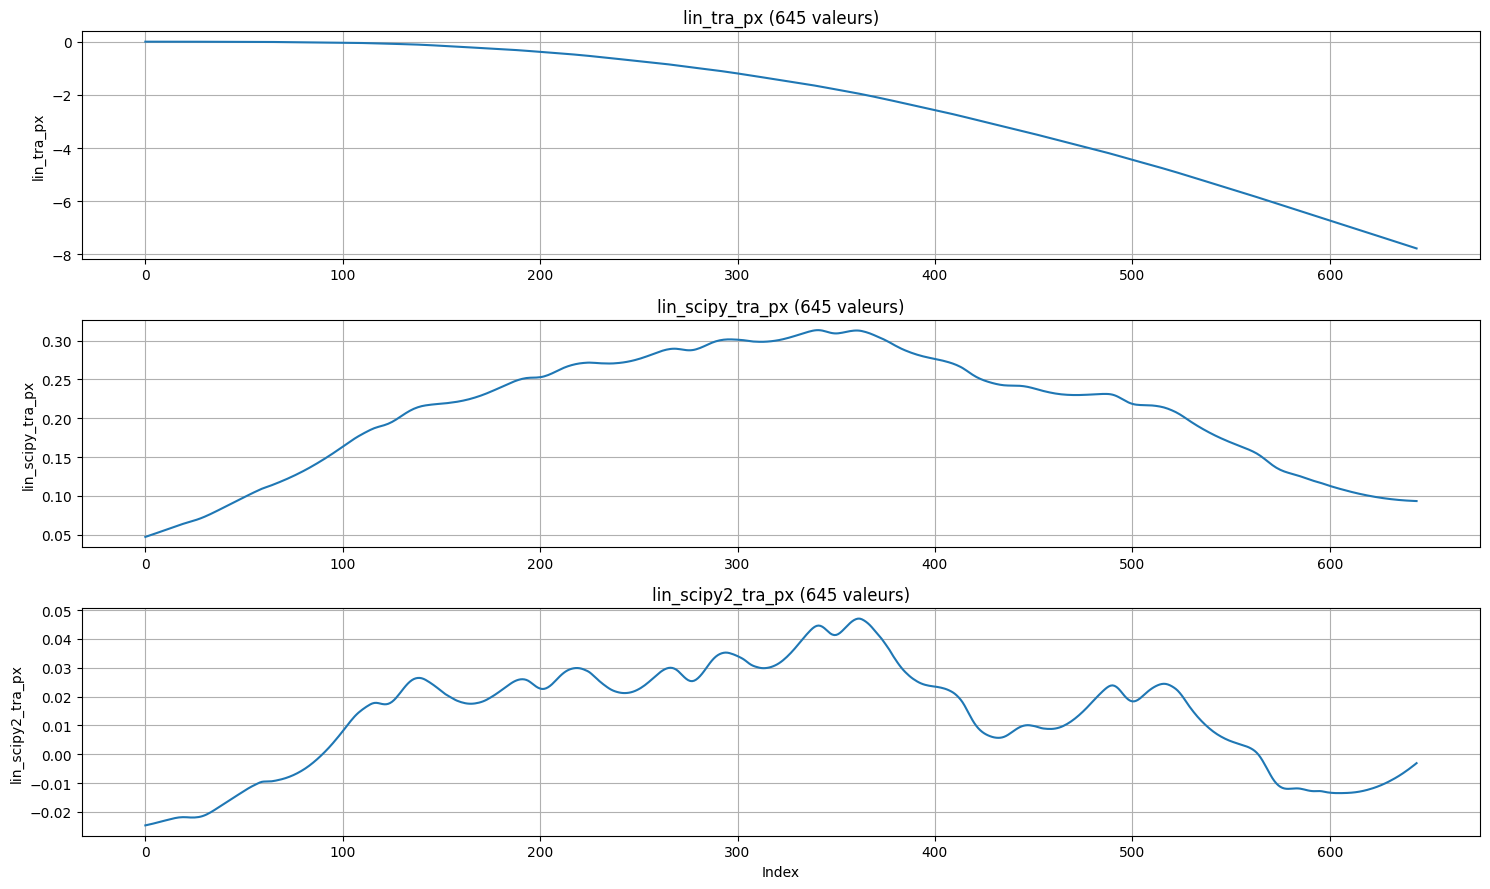

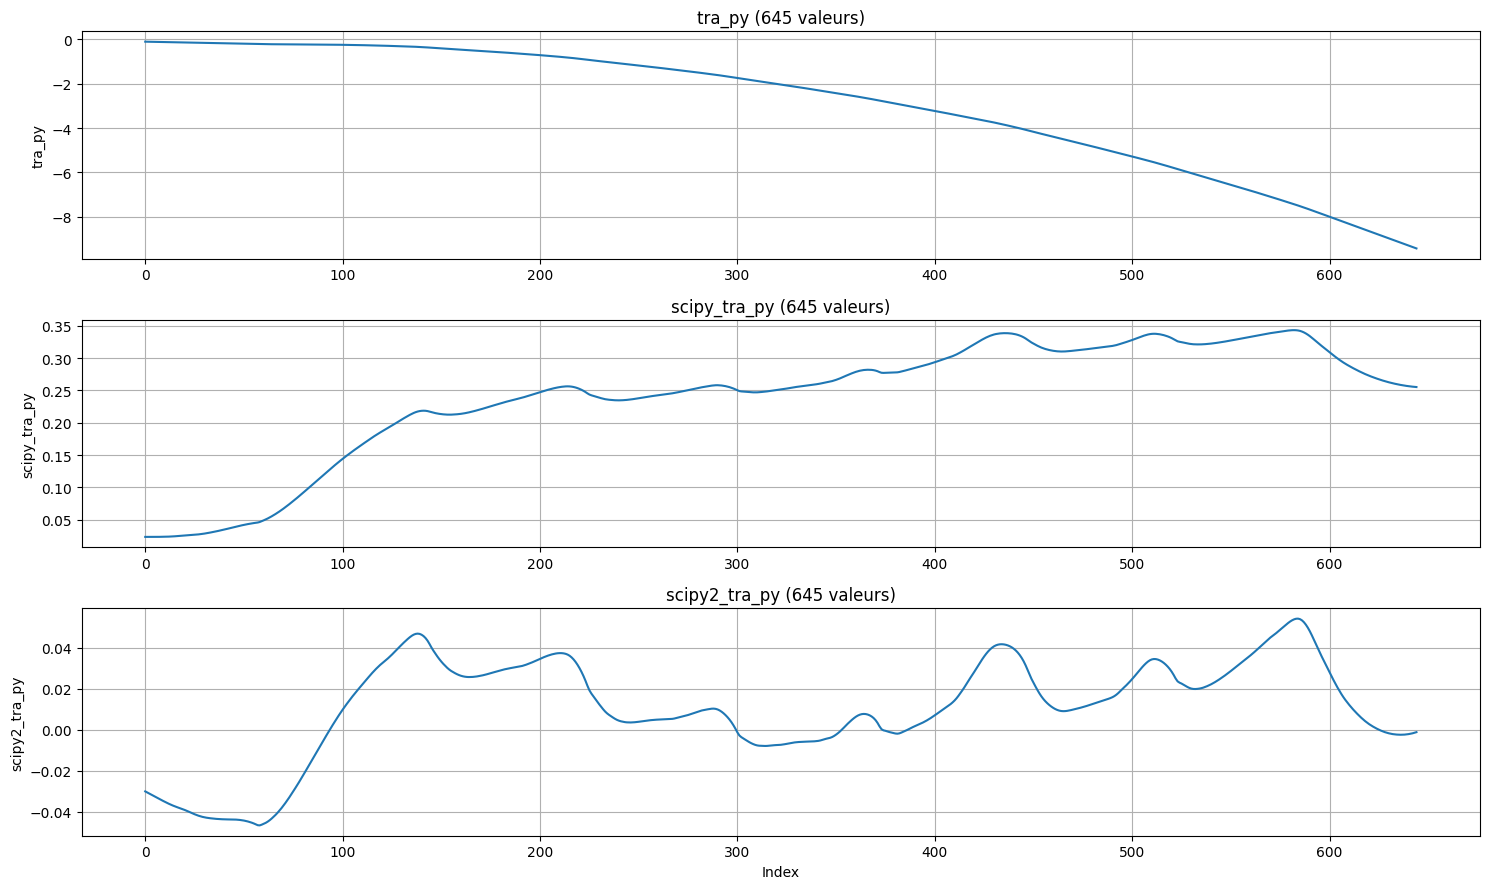

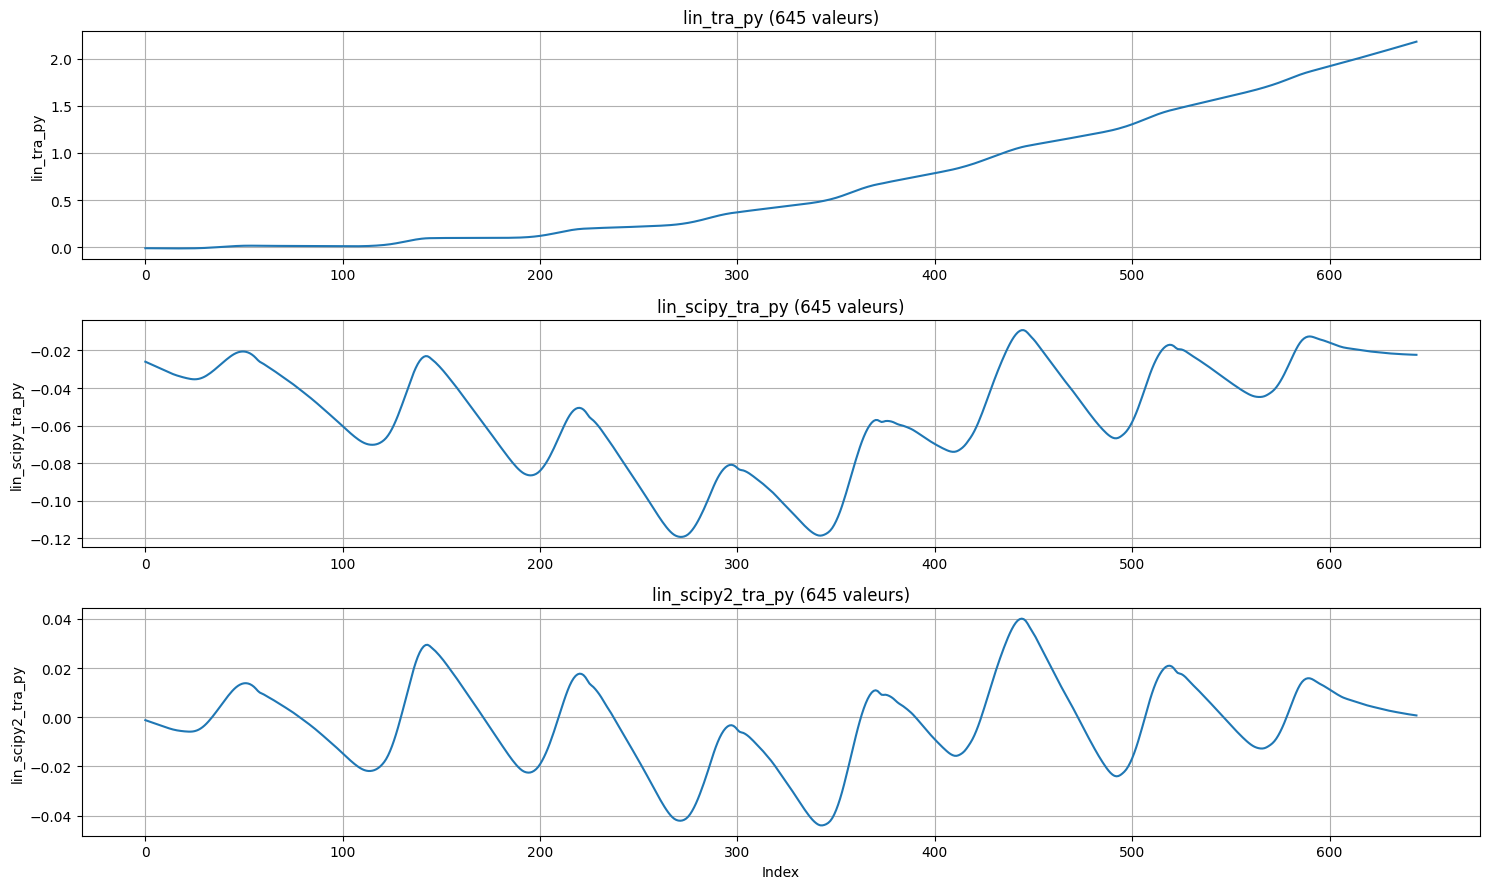

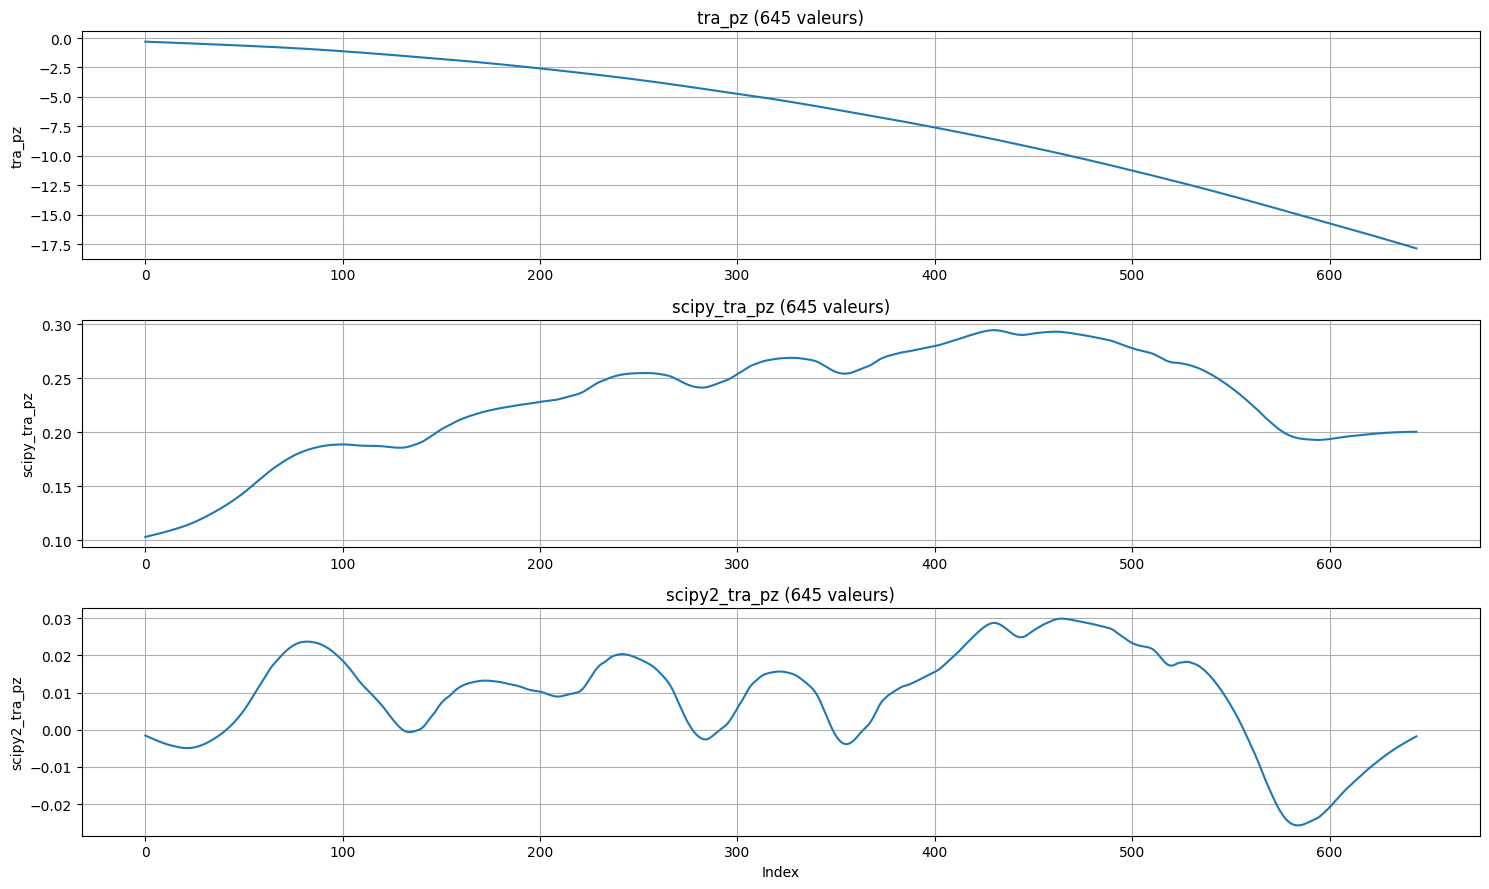

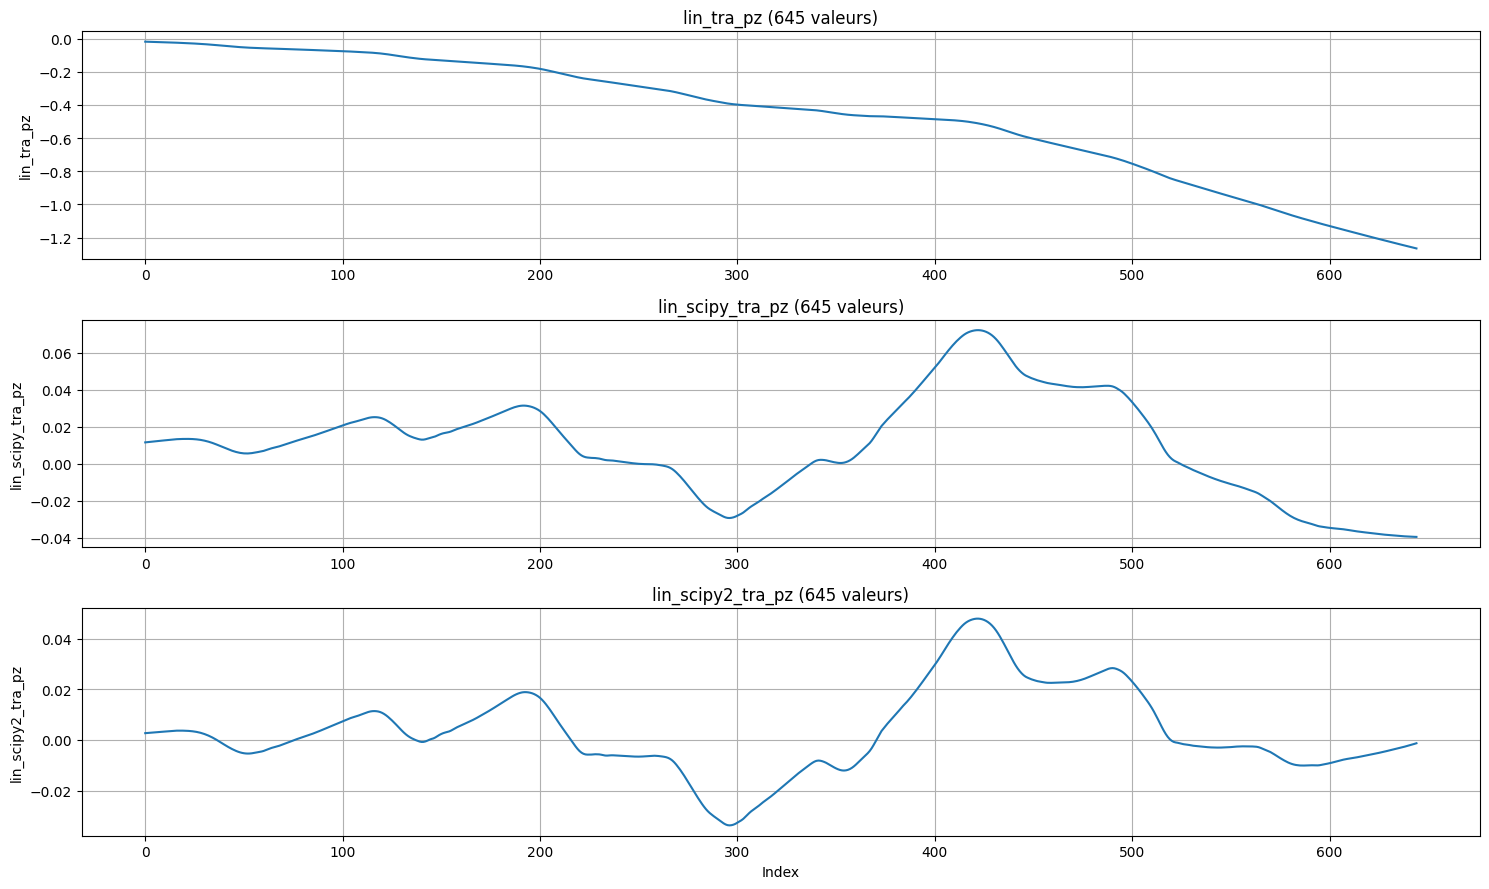

In [ ]:
#px:
draw_data3(tra_px, scipy_tra_px, scipy2_tra_px, start=s, end=e, label_x='tra_px', label_y='scipy_tra_px', label_z='scipy2_tra_px')
draw_data3(lin_tra_px, lin_scipy_tra_px, lin_scipy2_tra_px, start=s, end=e, label_x='lin_tra_px', label_y='lin_scipy_tra_px', label_z='lin_scipy2_tra_px')
#py:
draw_data3(tra_py, scipy_tra_py, scipy2_tra_py, start=s, end=e, label_x='tra_py', label_y='scipy_tra_py', label_z='scipy2_tra_py')
draw_data3(lin_tra_py, lin_scipy_tra_py, lin_scipy2_tra_py, start=s, end=e, label_x='lin_tra_py', label_y='lin_scipy_tra_py', label_z='lin_scipy2_tra_py')
#pz:
draw_data3(tra_pz, scipy_tra_pz, scipy2_tra_pz, start=s, end=e, label_x='tra_pz', label_y='scipy_tra_pz', label_z='scipy2_tra_pz')
draw_data3(lin_tra_pz, lin_scipy_tra_pz, lin_scipy2_tra_pz, start=s, end=e, label_x='lin_tra_pz', label_y='lin_scipy_tra_pz', label_z='lin_scipy2_tra_pz')

# scipy : 2D trajectory

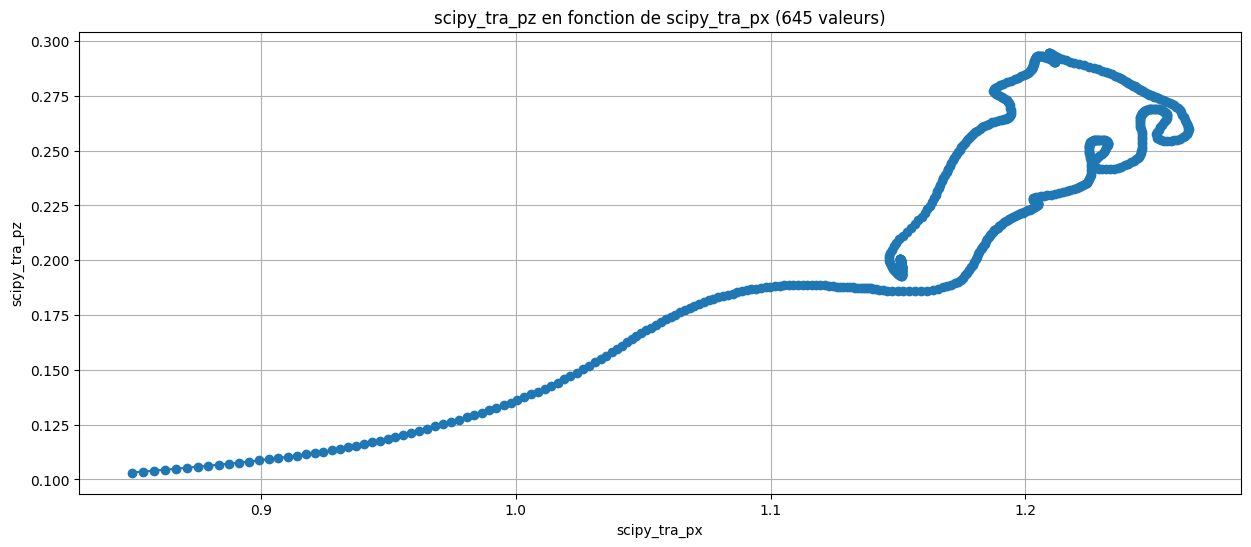

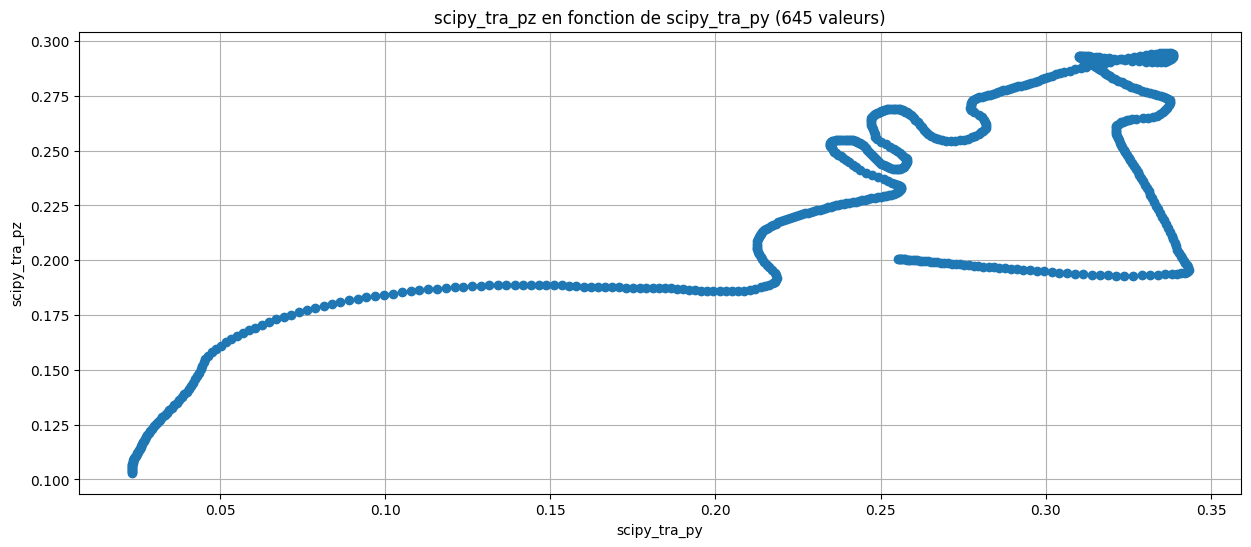

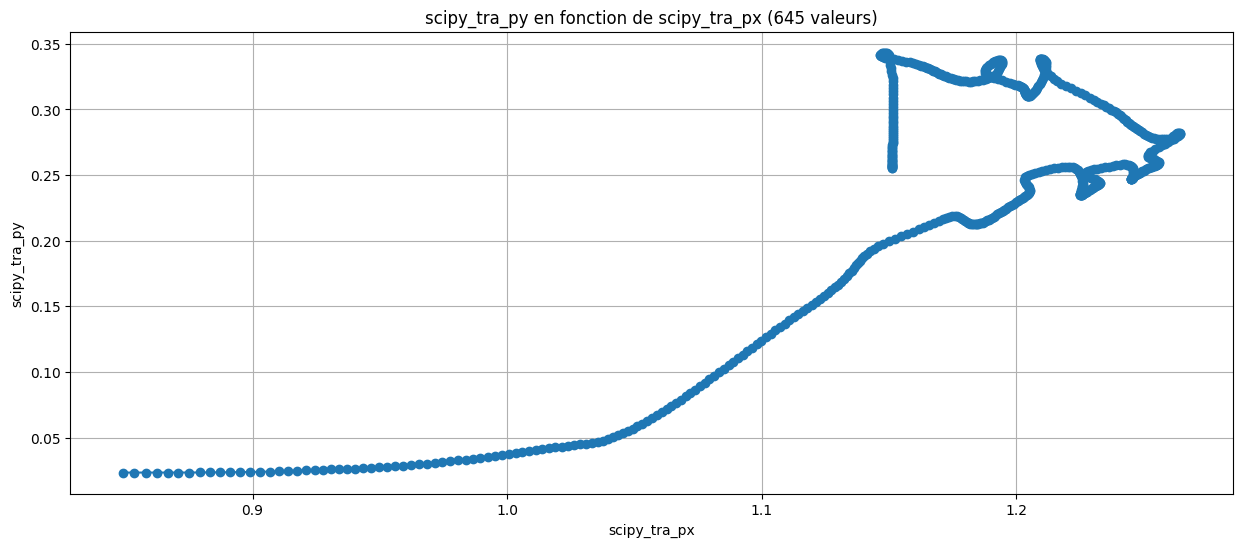

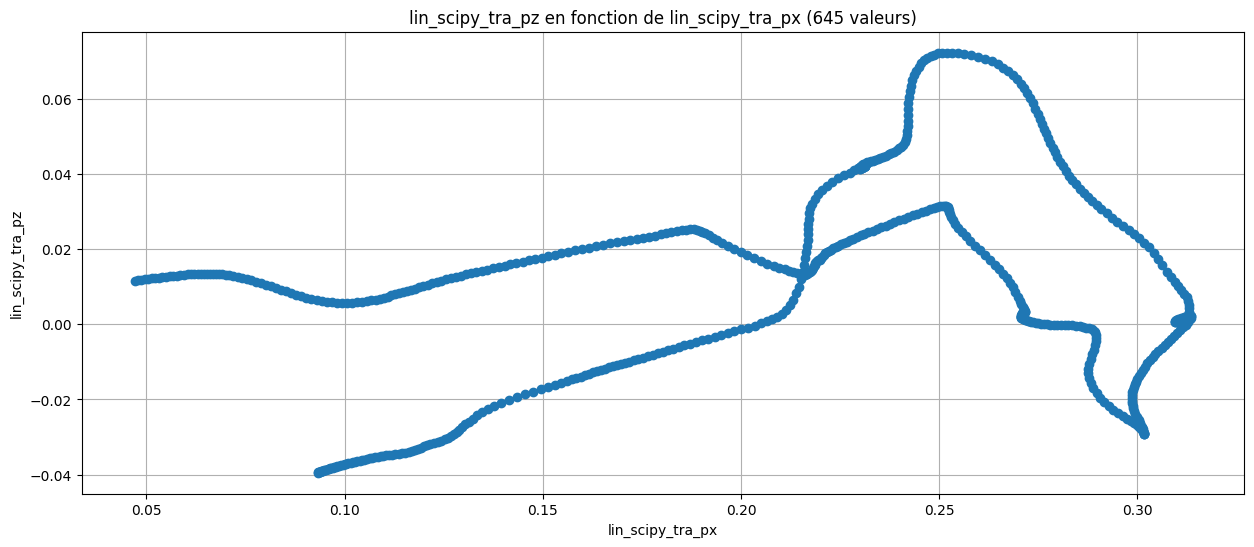

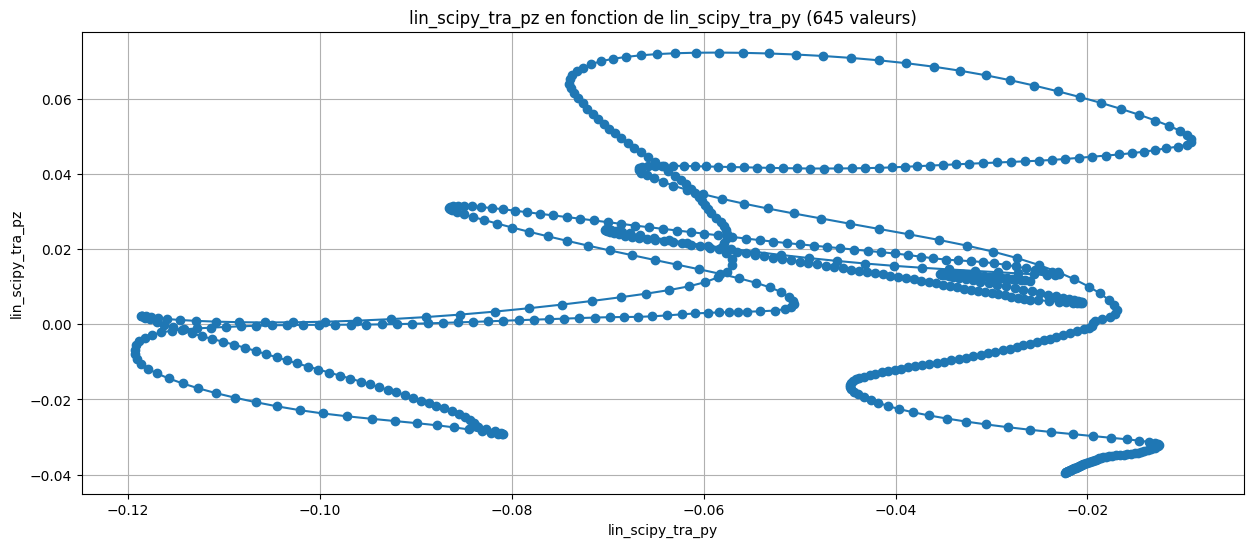

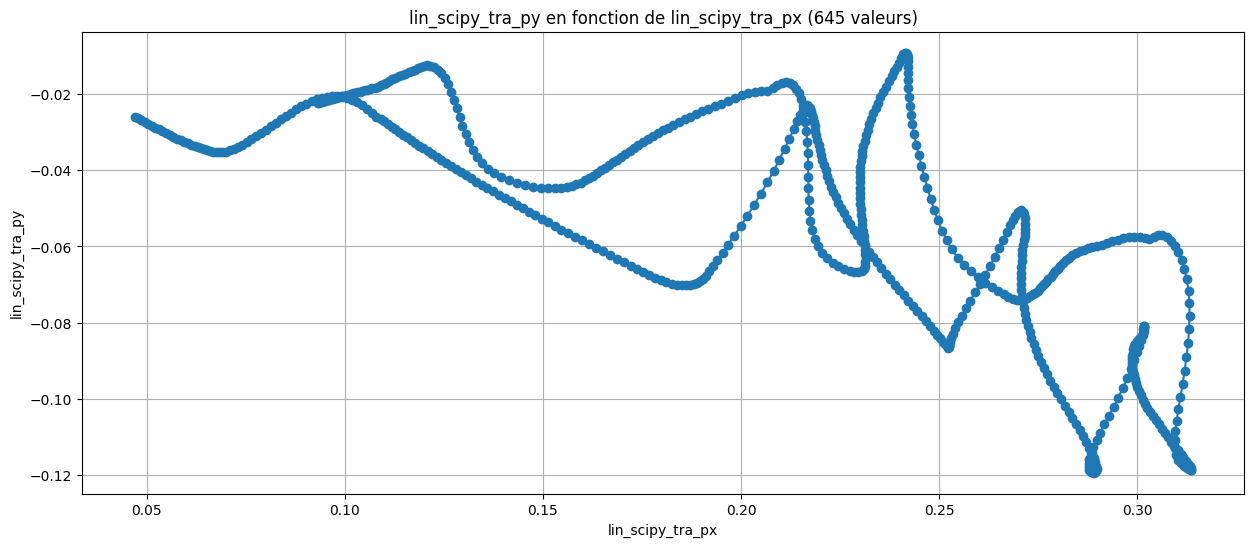

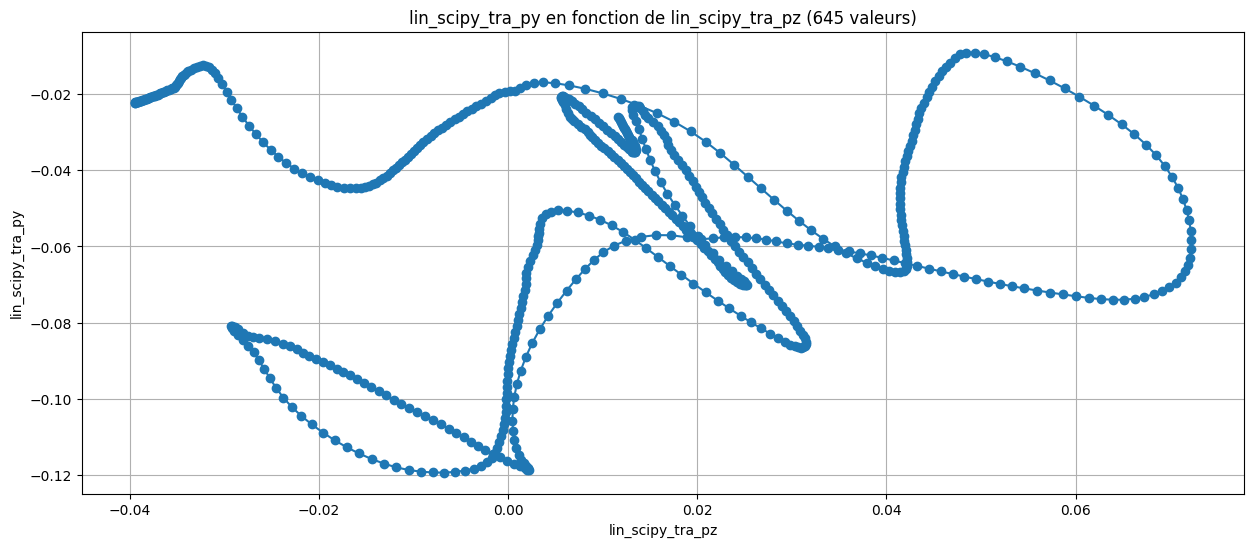

In [78]:
e = 100
s = max
compare_data(scipy_tra_px, scipy_tra_pz, start=e, end=s, xlabel='scipy_tra_px', ylabel='scipy_tra_pz')
compare_data(scipy_tra_py, scipy_tra_pz, start=e, end=s, xlabel='scipy_tra_py', ylabel='scipy_tra_pz')
compare_data(scipy_tra_px, scipy_tra_py, start=e, end=s, xlabel='scipy_tra_px', ylabel='scipy_tra_py')
compare_data(lin_scipy_tra_px, lin_scipy_tra_pz, start=e, end=s, xlabel='lin_scipy_tra_px', ylabel='lin_scipy_tra_pz')
compare_data(lin_scipy_tra_py, lin_scipy_tra_pz, start=e, end=s, xlabel='lin_scipy_tra_py', ylabel='lin_scipy_tra_pz')
compare_data(lin_scipy_tra_px, lin_scipy_tra_py, start=e, end=s, xlabel='lin_scipy_tra_px', ylabel='lin_scipy_tra_py')
compare_data(lin_scipy_tra_pz, lin_scipy_tra_py, start=e, end=s, xlabel='lin_scipy_tra_pz', ylabel='lin_scipy_tra_py')

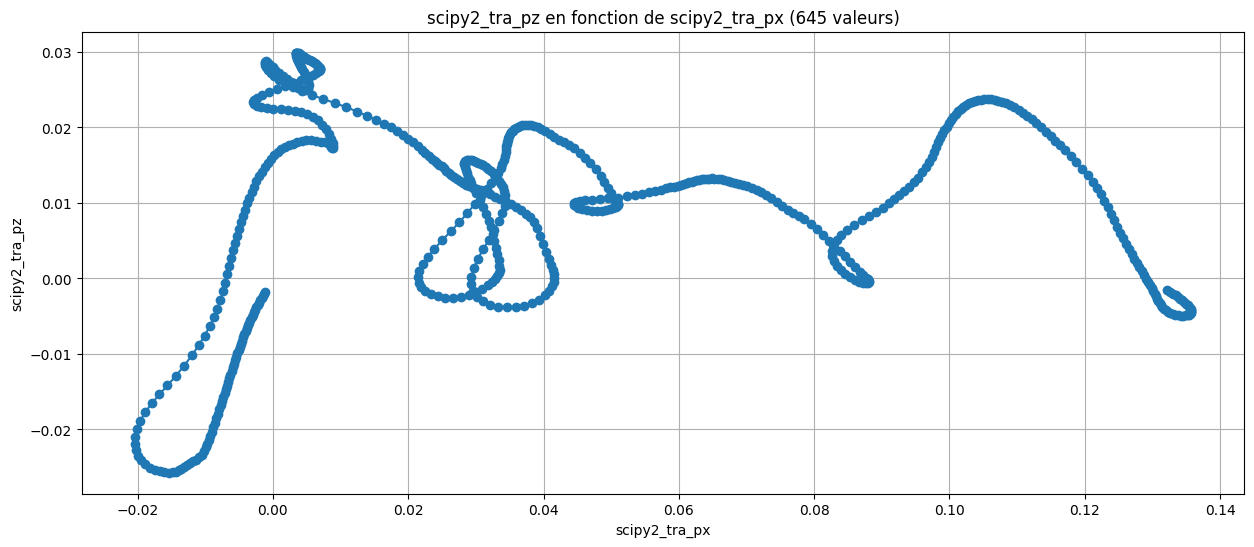

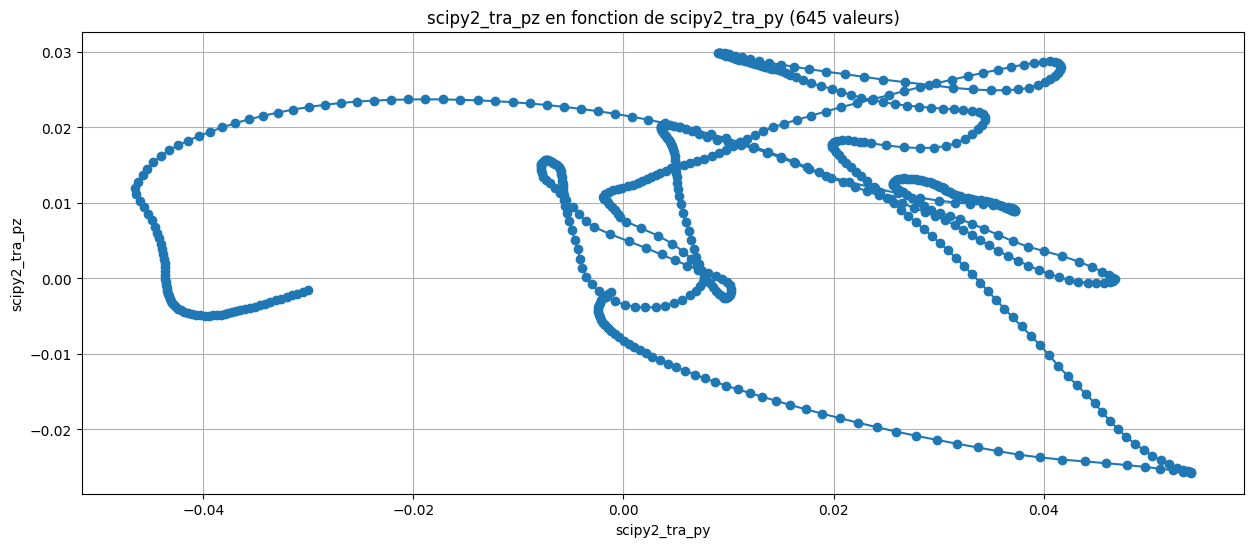

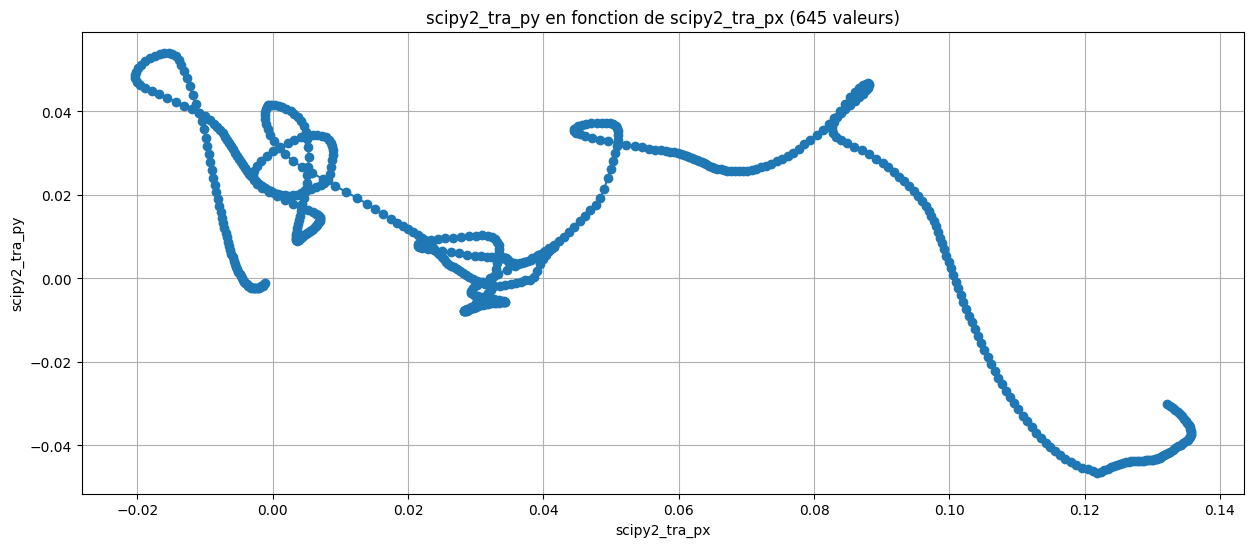

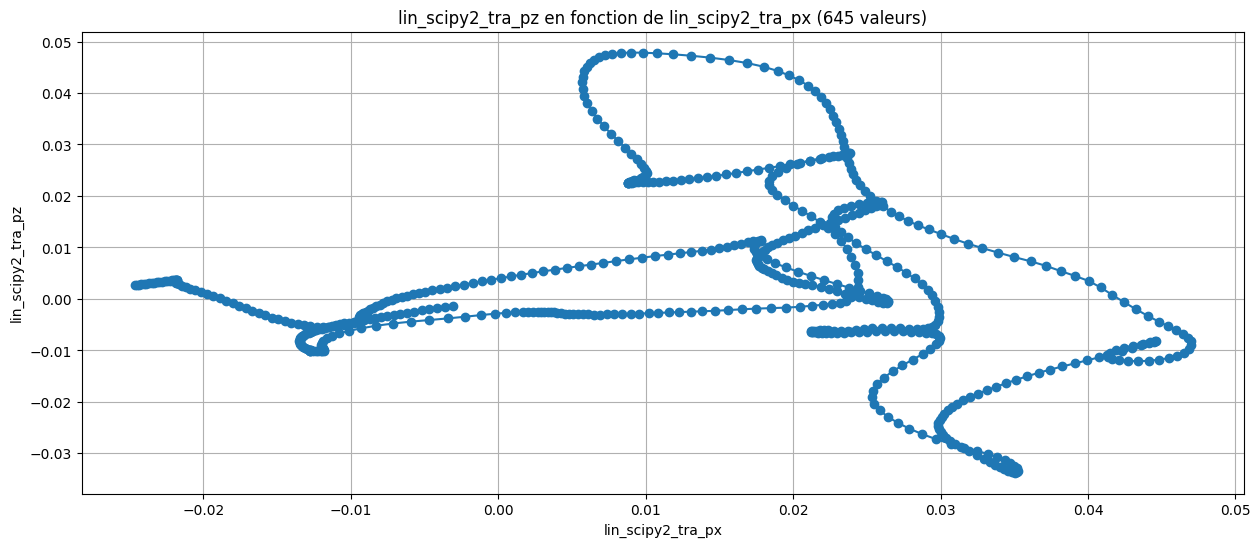

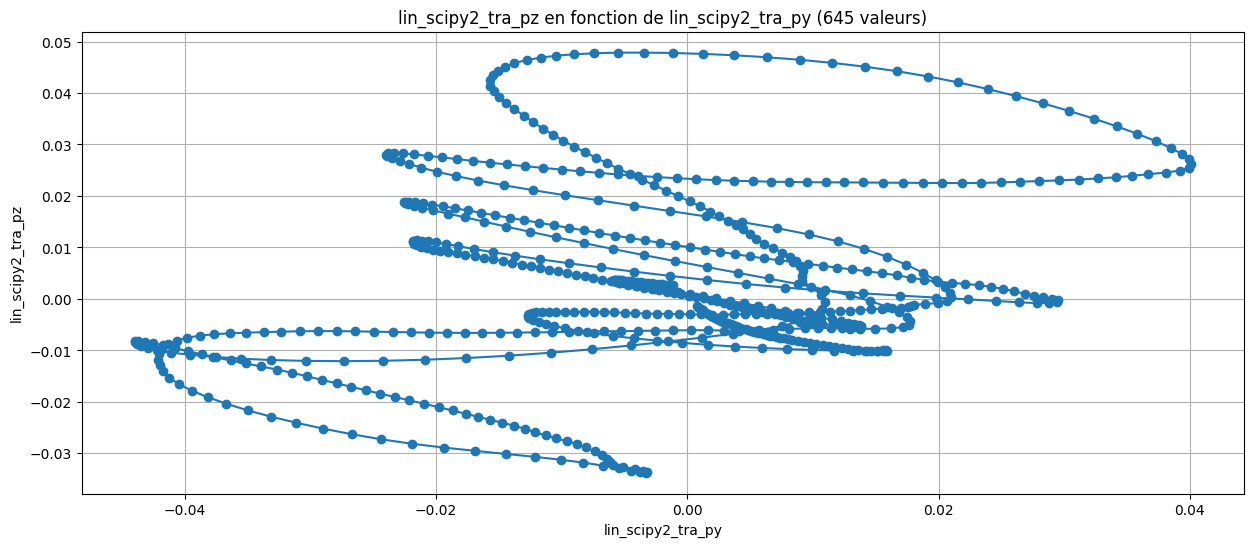

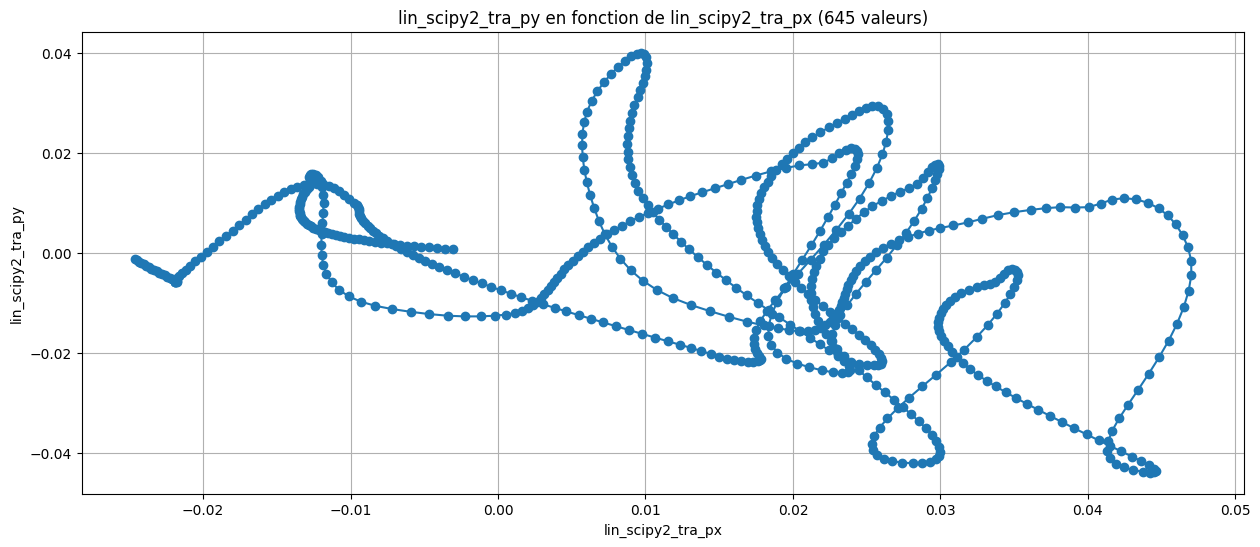

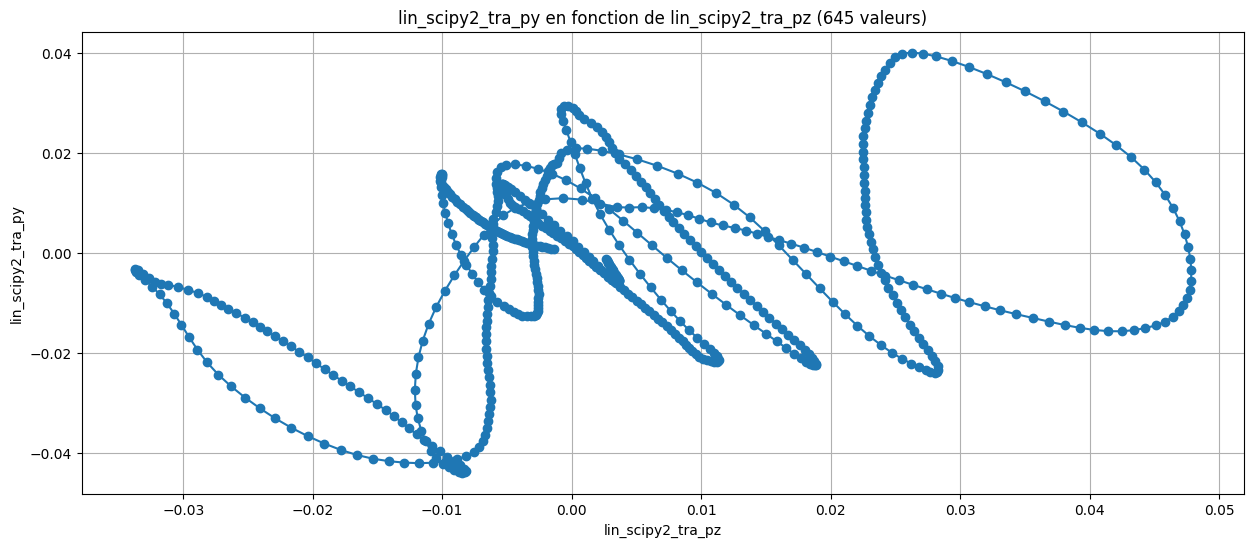

In [77]:
compare_data(scipy2_tra_px, scipy2_tra_pz, start=e, end=s, xlabel='scipy2_tra_px', ylabel='scipy2_tra_pz')
compare_data(scipy2_tra_py, scipy2_tra_pz, start=e, end=s, xlabel='scipy2_tra_py', ylabel='scipy2_tra_pz')
compare_data(scipy2_tra_px, scipy2_tra_py, start=e, end=s, xlabel='scipy2_tra_px', ylabel='scipy2_tra_py')
compare_data(lin_scipy2_tra_px, lin_scipy2_tra_pz, start=e, end=s, xlabel='lin_scipy2_tra_px', ylabel='lin_scipy2_tra_pz')
compare_data(lin_scipy2_tra_py, lin_scipy2_tra_pz, start=e, end=s, xlabel='lin_scipy2_tra_py', ylabel='lin_scipy2_tra_pz')
compare_data(lin_scipy2_tra_px, lin_scipy2_tra_py, start=e, end=s, xlabel='lin_scipy2_tra_px', ylabel='lin_scipy2_tra_py')
compare_data(lin_scipy2_tra_pz, lin_scipy2_tra_py, start=e, end=s, xlabel='lin_scipy2_tra_pz', ylabel='lin_scipy2_tra_py')

# irr : V and pos calculations

In [81]:
irr_tra_vx, irr_tra_vy, irr_tra_vz = high_pass_filter_scipy(tra_vx, tra_vy, tra_vz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)
lin_irr_tra_vx, lin_irr_tra_vy, lin_irr_tra_vz = high_pass_filter_scipy(lin_tra_vx, lin_tra_vy, lin_tra_vz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)

irr_tra_px, irr_tra_py, irr_tra_pz = trapezoidal_integration(irr_tra_vx, irr_tra_vy, irr_tra_vz, delta_t).T
lin_irr_tra_px, lin_irr_tra_py, lin_irr_tra_pz = trapezoidal_integration(lin_irr_tra_vx, lin_irr_tra_vy, lin_irr_tra_vz, delta_t).T

irr2_tra_px, irr2_tra_py, irr2_tra_pz = high_pass_filter_scipy(irr_tra_px, irr_tra_py, irr_tra_pz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)
lin_irr2_tra_px, lin_irr2_tra_py, lin_irr2_tra_pz = high_pass_filter_scipy(lin_irr_tra_px, lin_irr_tra_py, lin_irr_tra_pz, cutoff=0.1, sample_period=np.mean(delta_t), order=1)

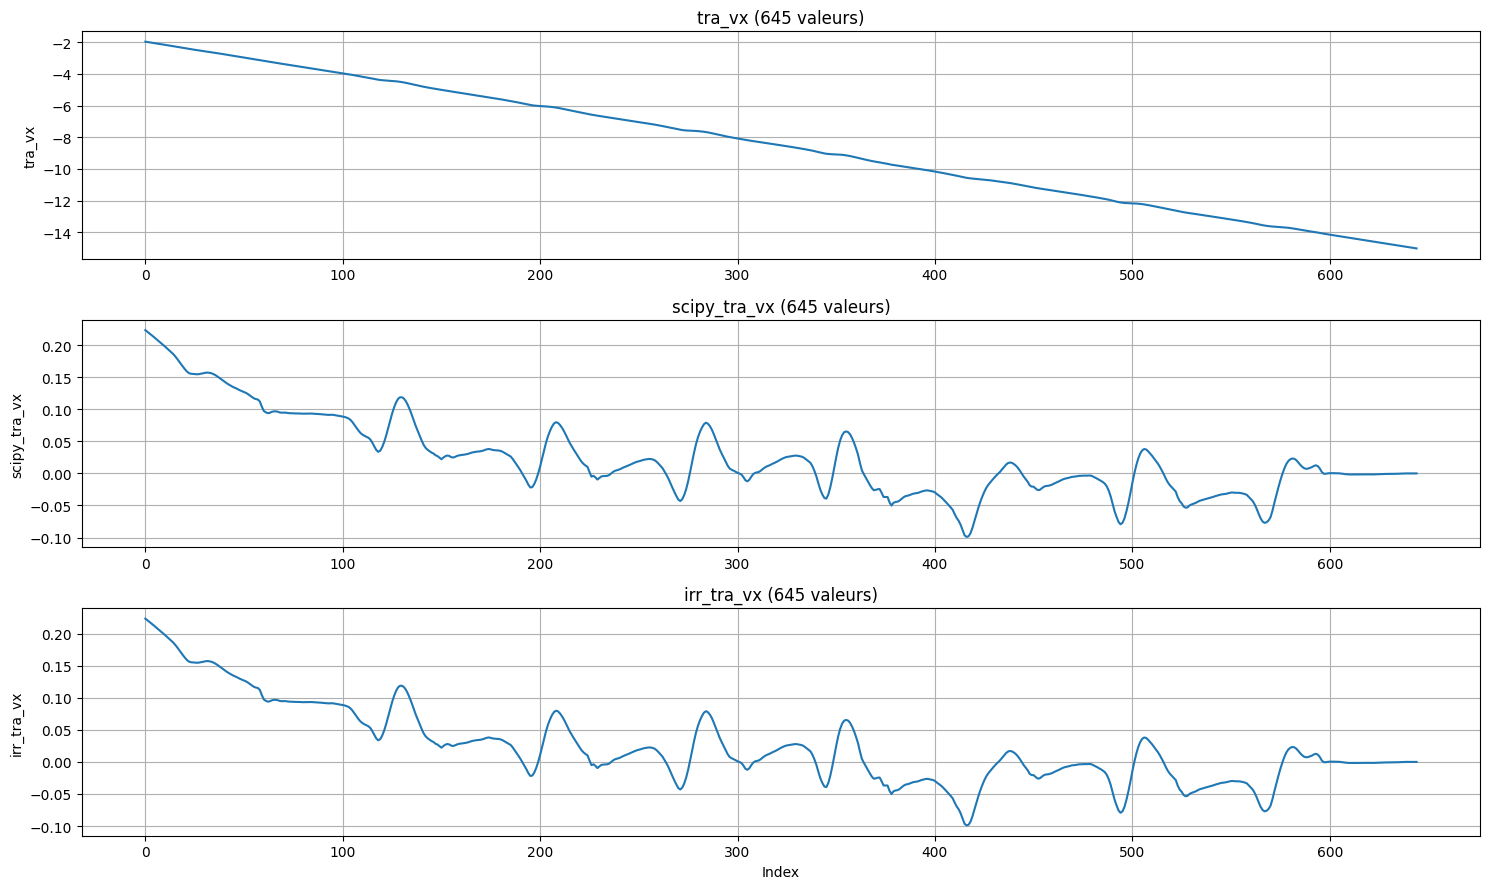

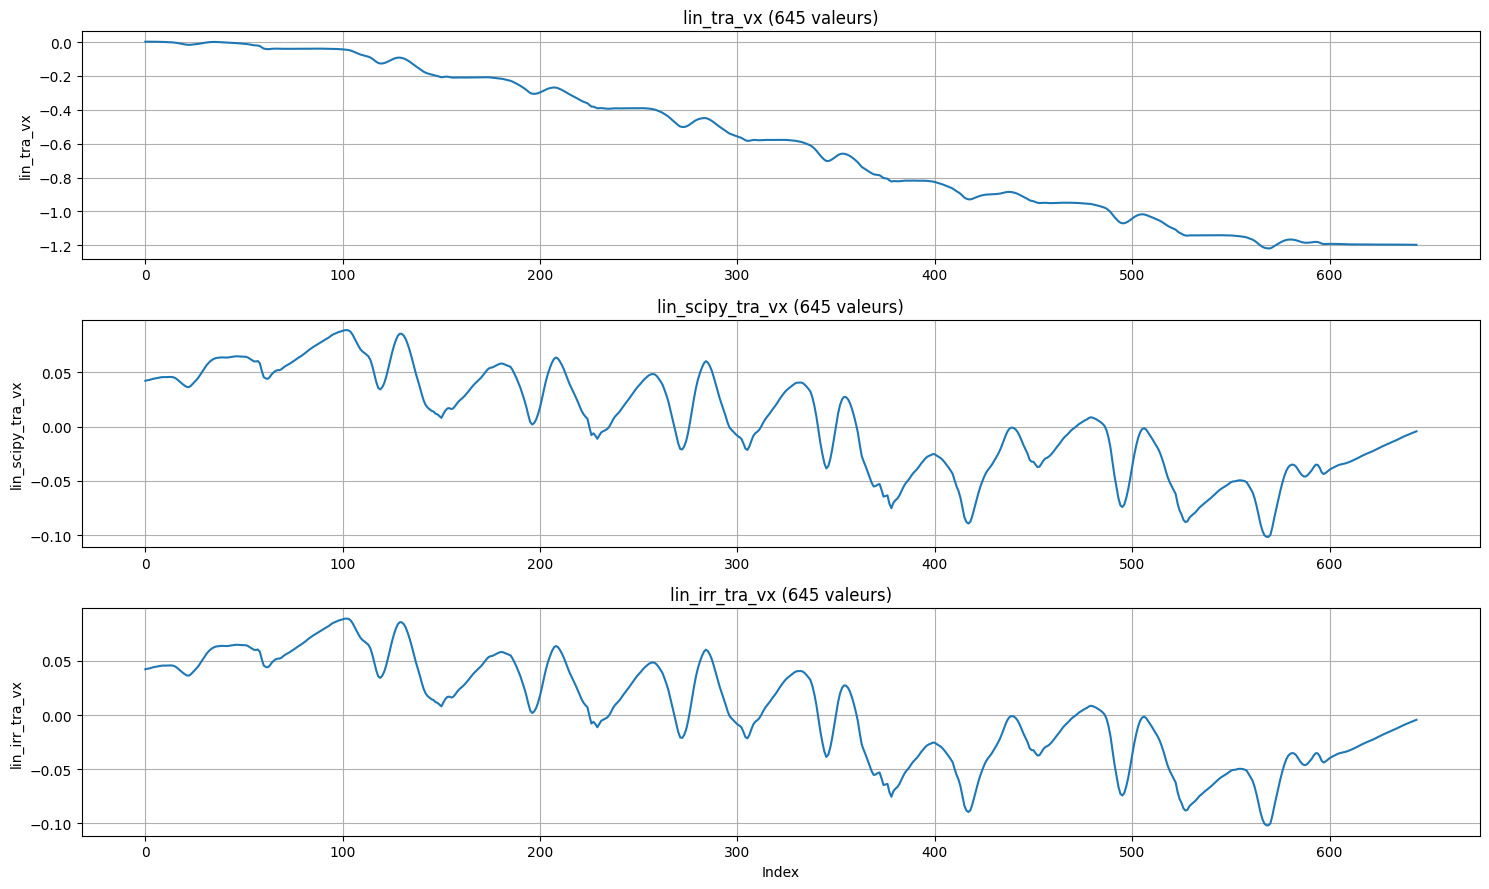

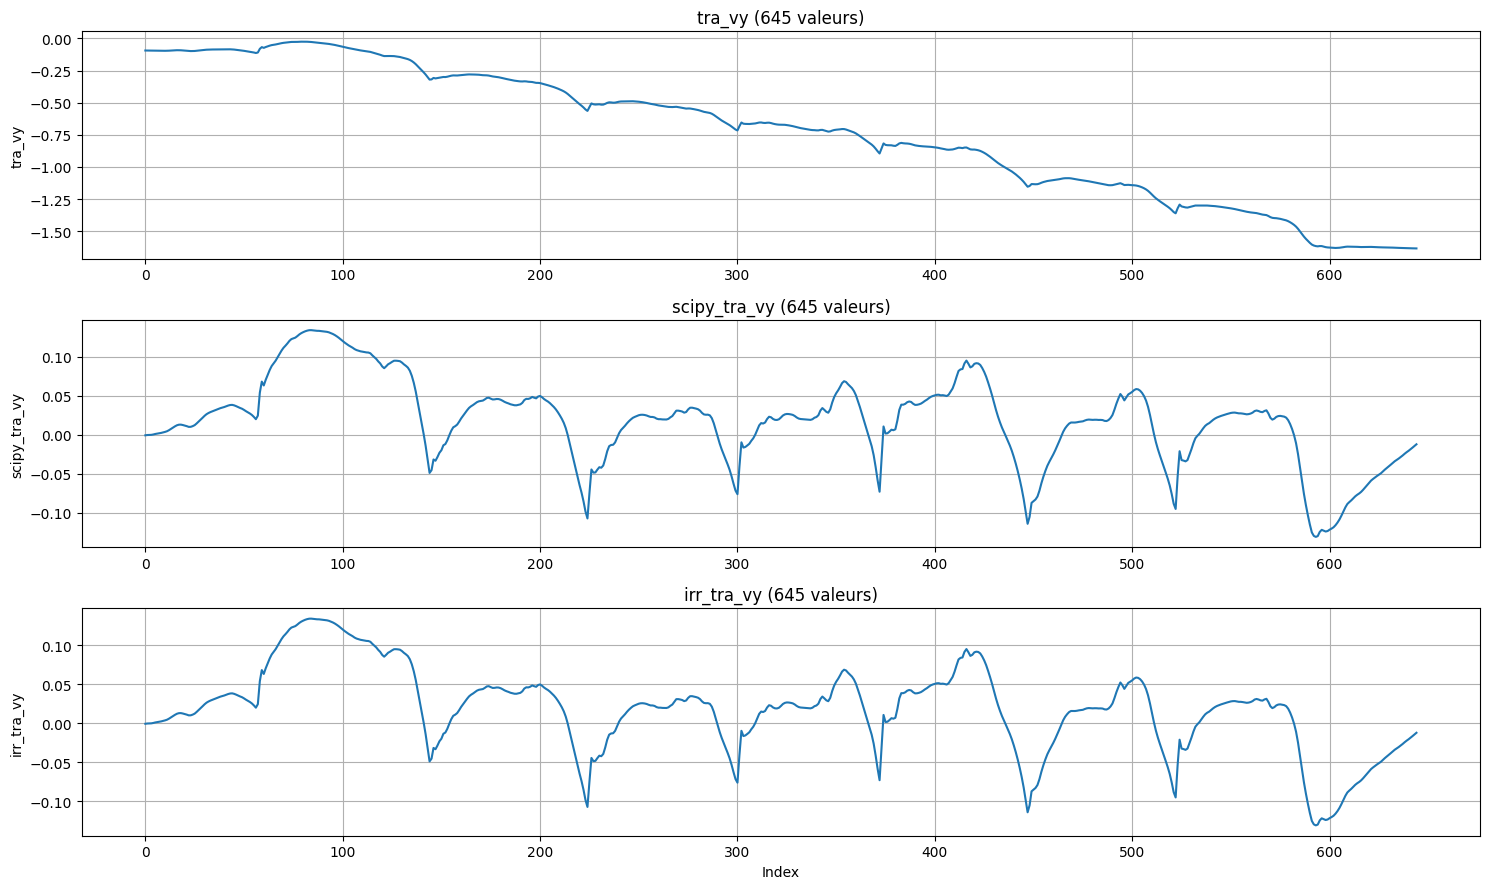

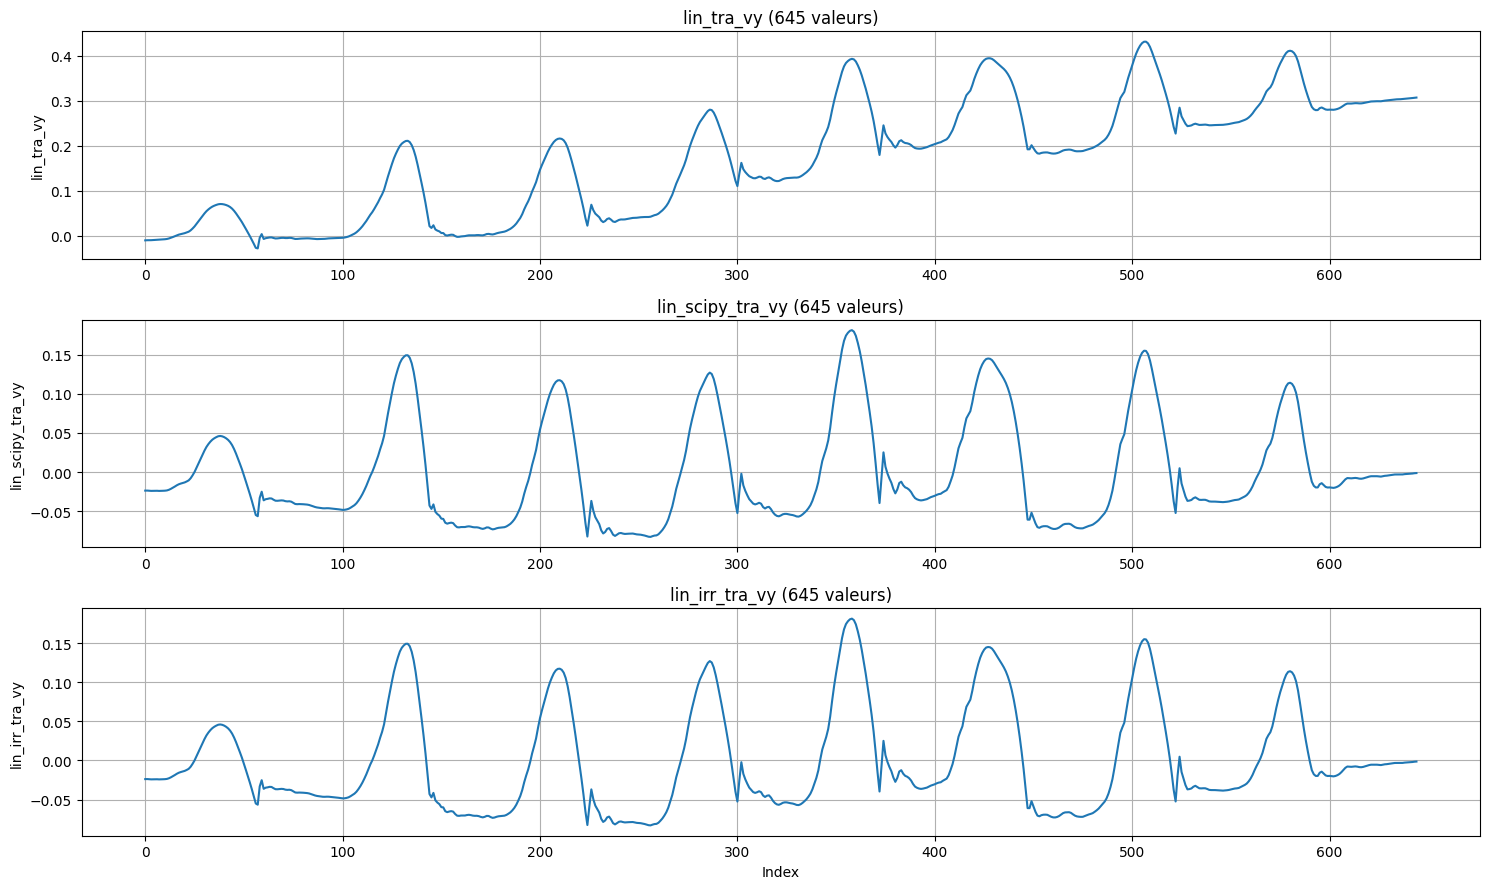

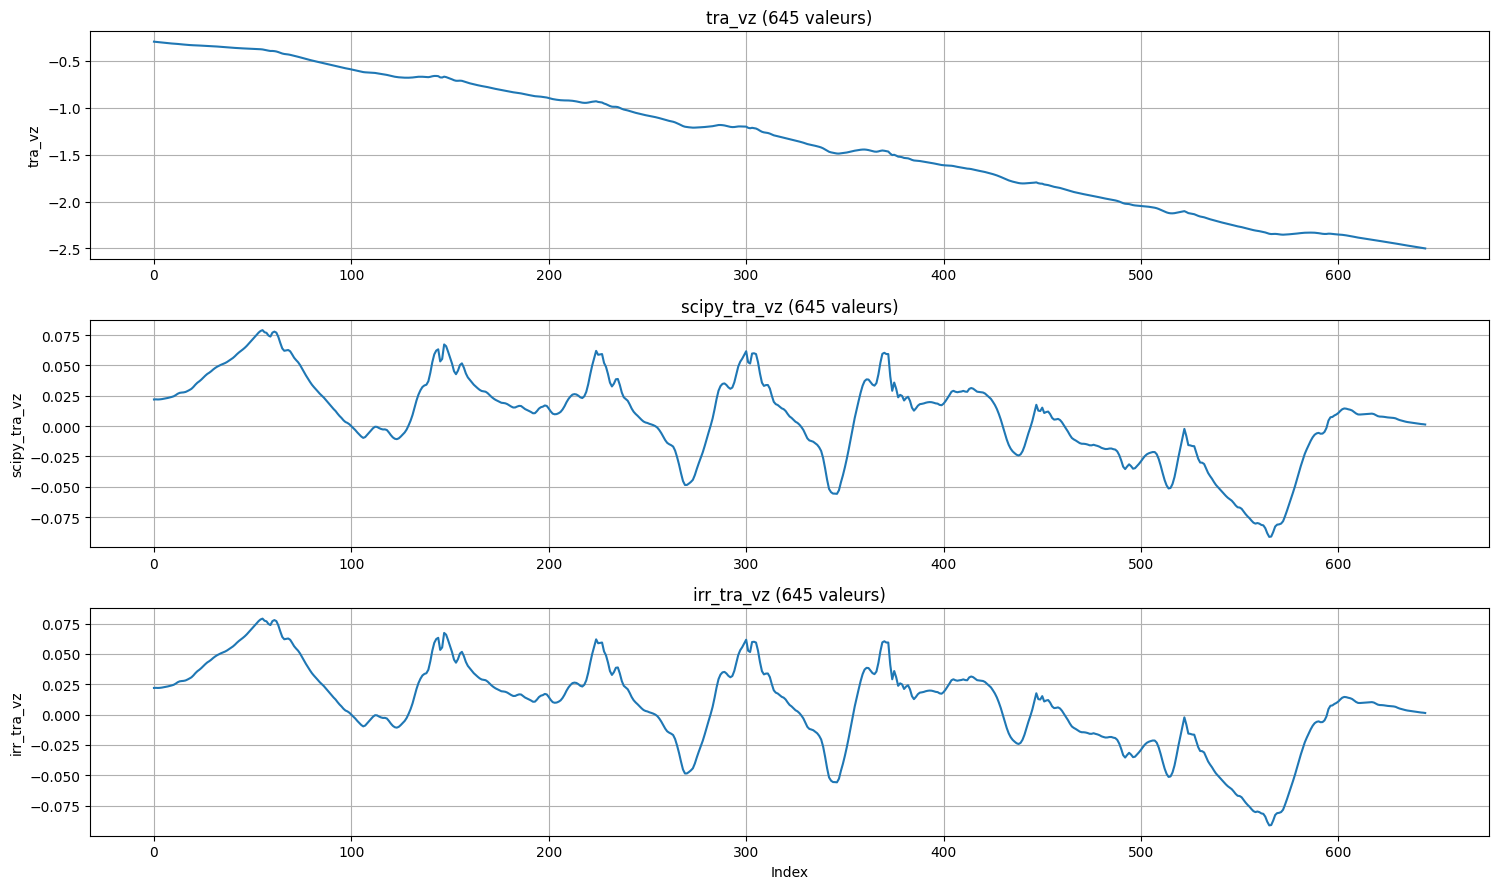

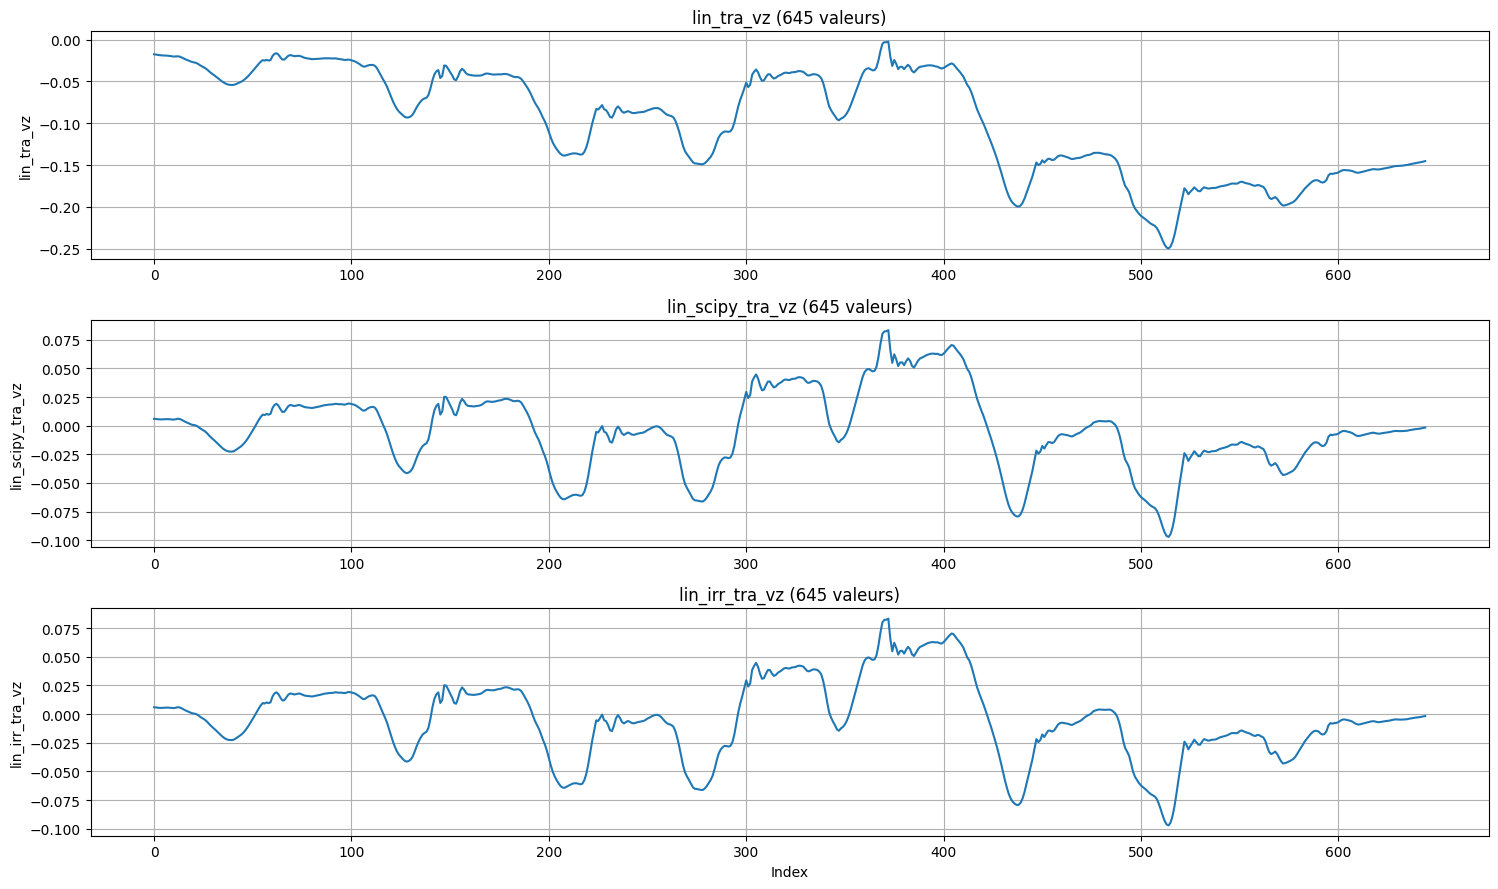

In [82]:
s=100
e=max
#vx:
draw_data3(tra_vx, scipy_tra_vx, irr_tra_vx, start=s, end=e, label_x='tra_vx', label_y='scipy_tra_vx', label_z='irr_tra_vx')
draw_data3(lin_tra_vx, lin_scipy_tra_vx, lin_irr_tra_vx, start=s, end=e, label_x='lin_tra_vx', label_y='lin_scipy_tra_vx', label_z='lin_irr_tra_vx')
#vy:
draw_data3(tra_vy, scipy_tra_vy, irr_tra_vy, start=s, end=e, label_x='tra_vy', label_y='scipy_tra_vy', label_z='irr_tra_vy')
draw_data3(lin_tra_vy, lin_scipy_tra_vy, lin_irr_tra_vy, start=s, end=e, label_x='lin_tra_vy', label_y='lin_scipy_tra_vy', label_z='lin_irr_tra_vy')
#vz:
draw_data3(tra_vz, scipy_tra_vz, irr_tra_vz, start=s, end=e, label_x='tra_vz', label_y='scipy_tra_vz', label_z='irr_tra_vz')
draw_data3(lin_tra_vz, lin_scipy_tra_vz, lin_irr_tra_vz, start=s, end=e, label_x='lin_tra_vz', label_y='lin_scipy_tra_vz', label_z='lin_irr_tra_vz')

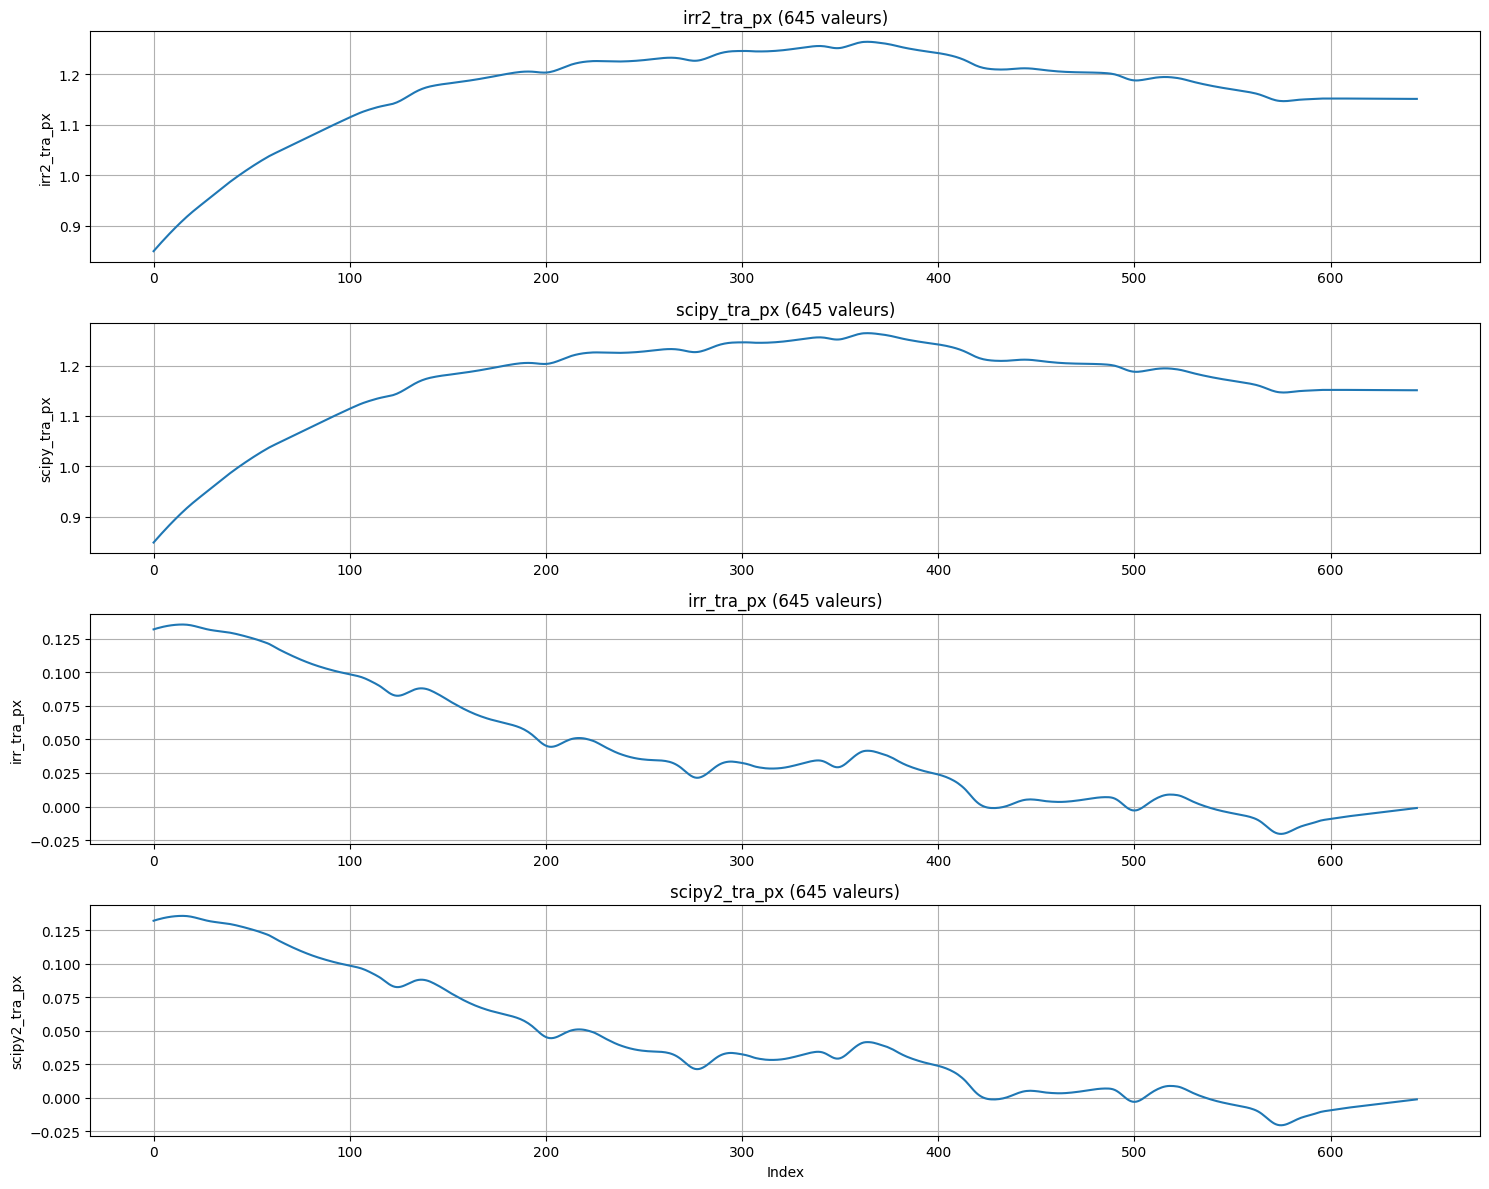

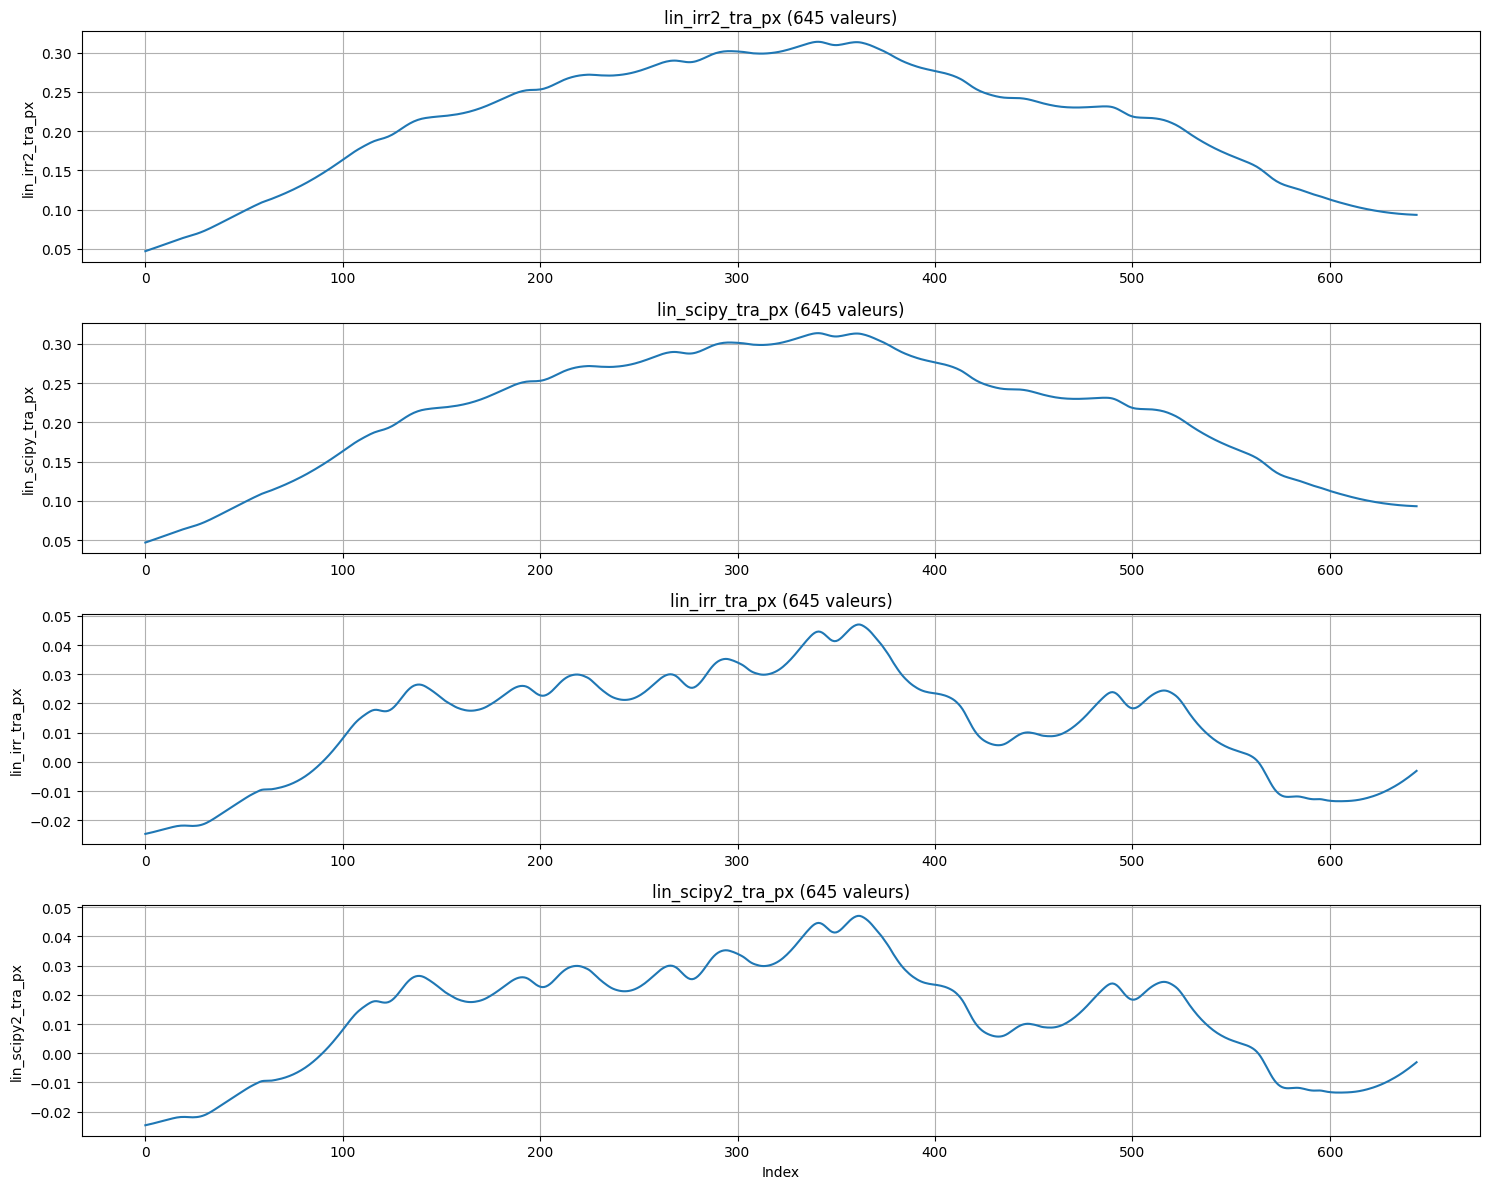

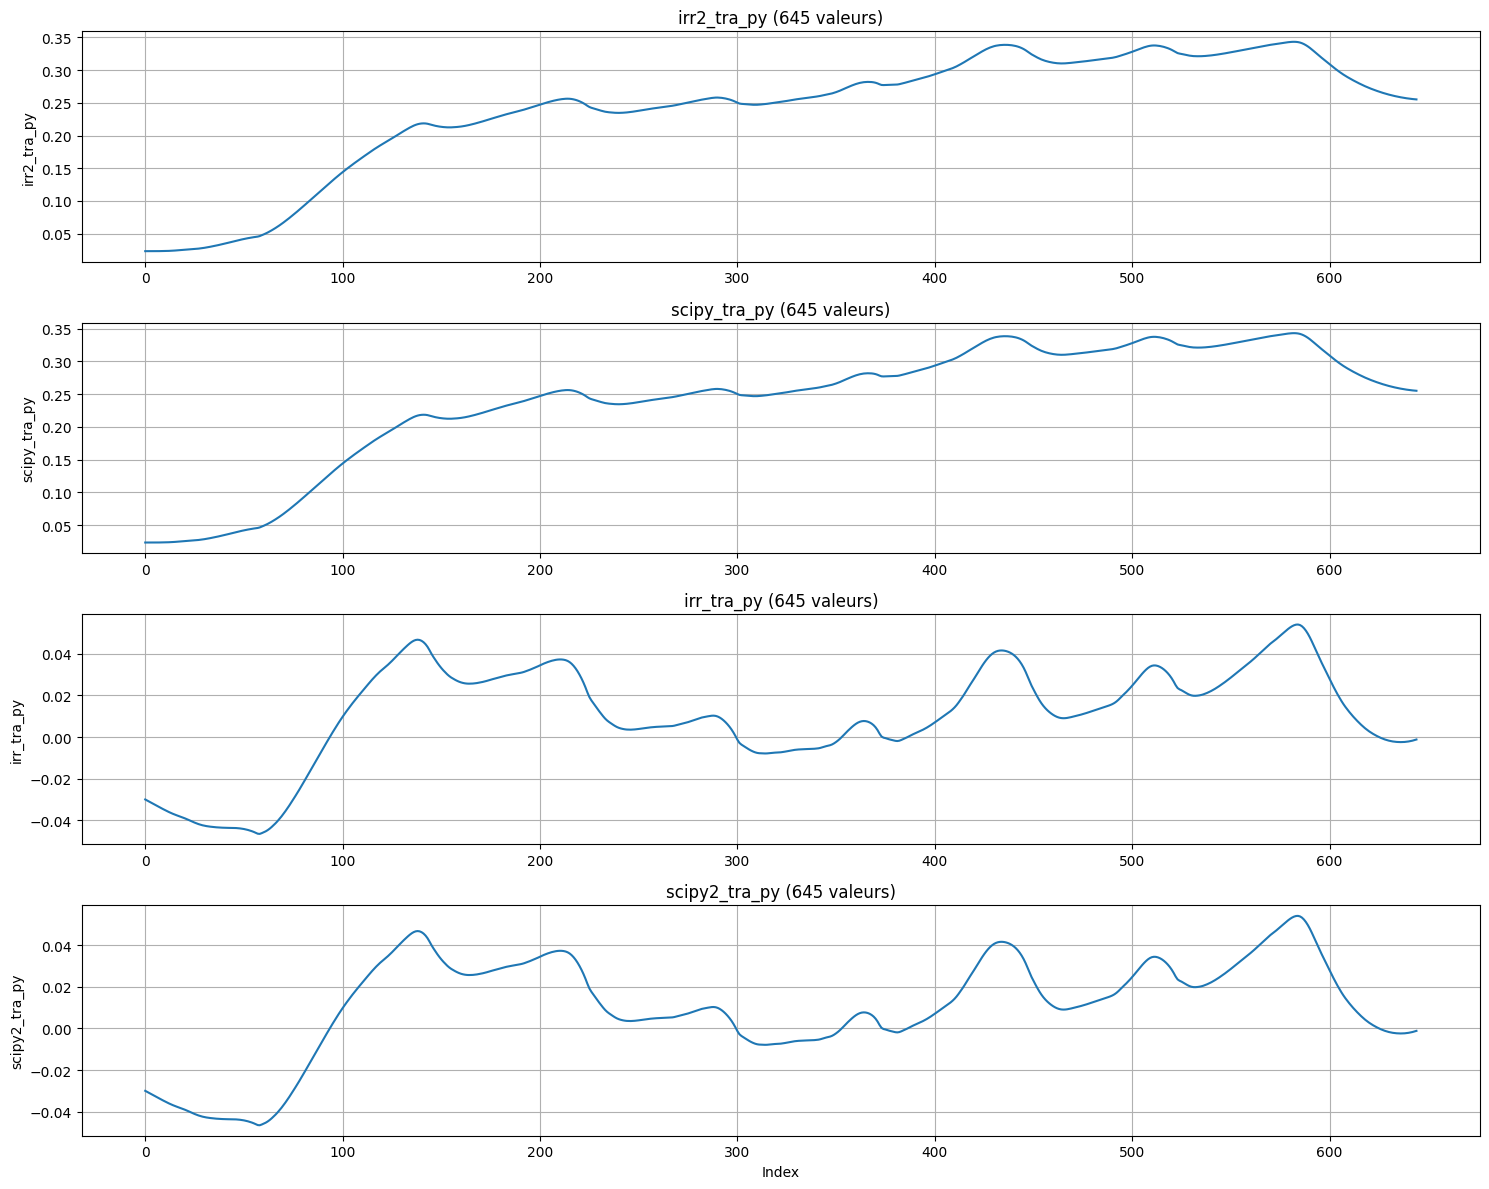

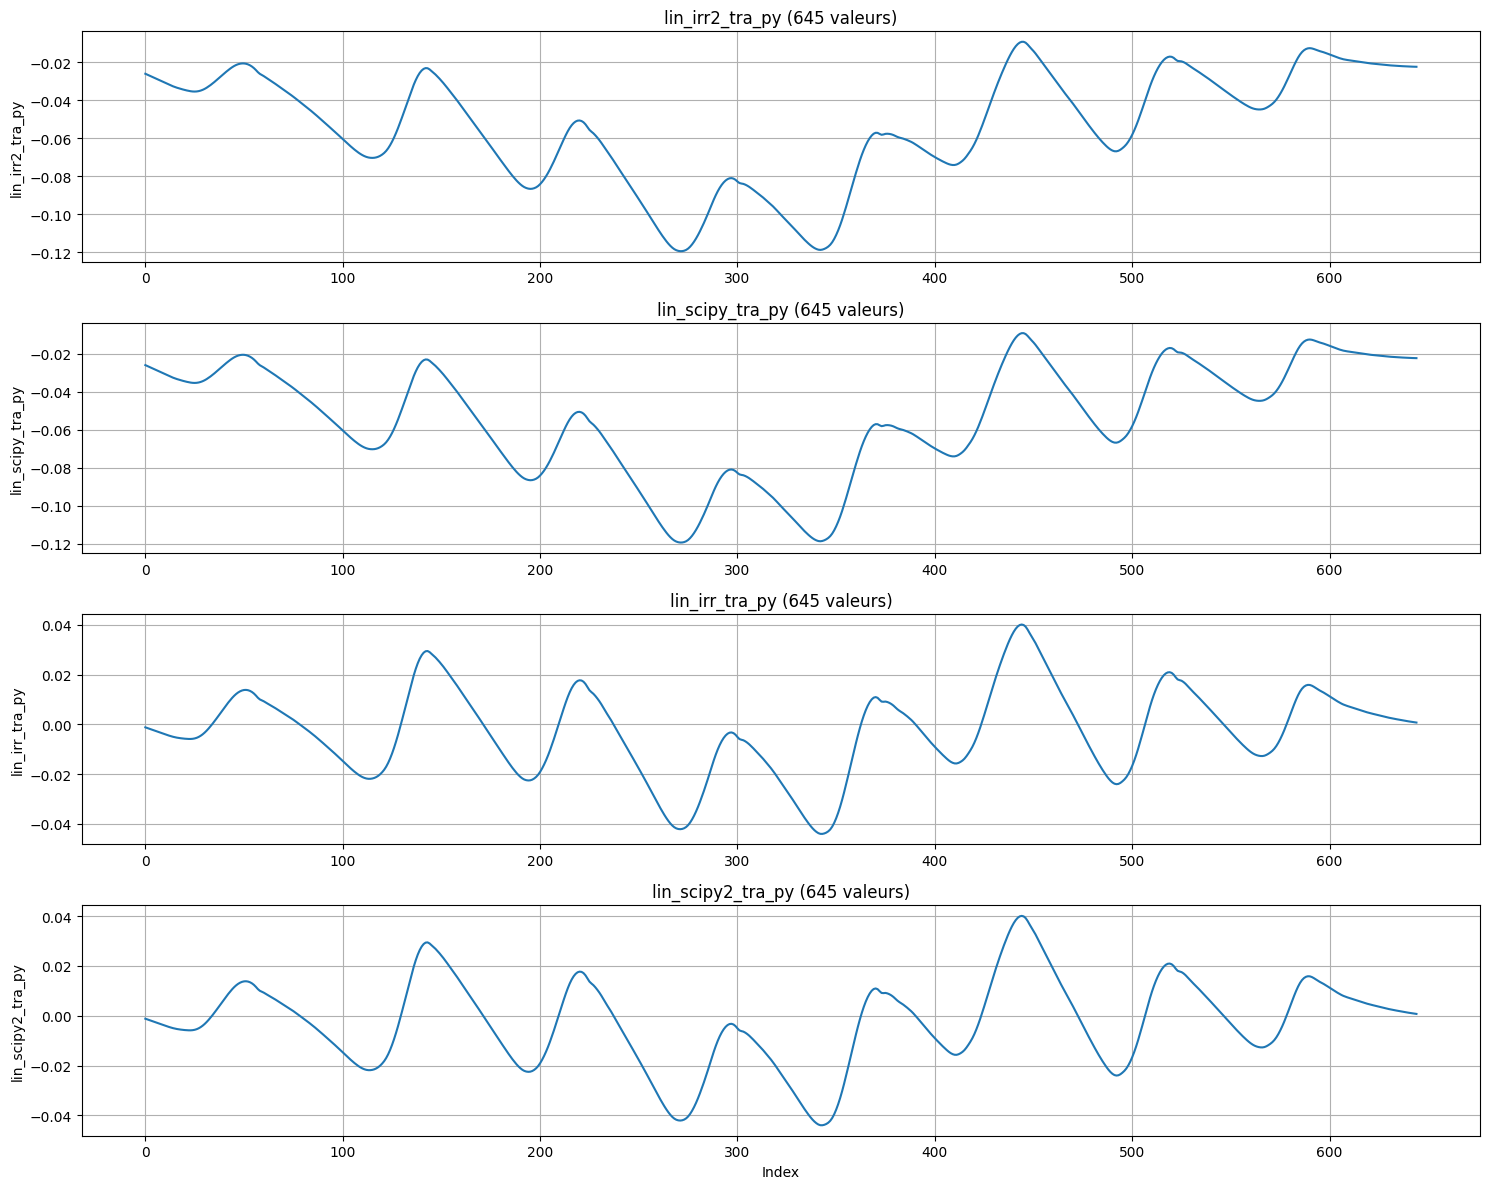

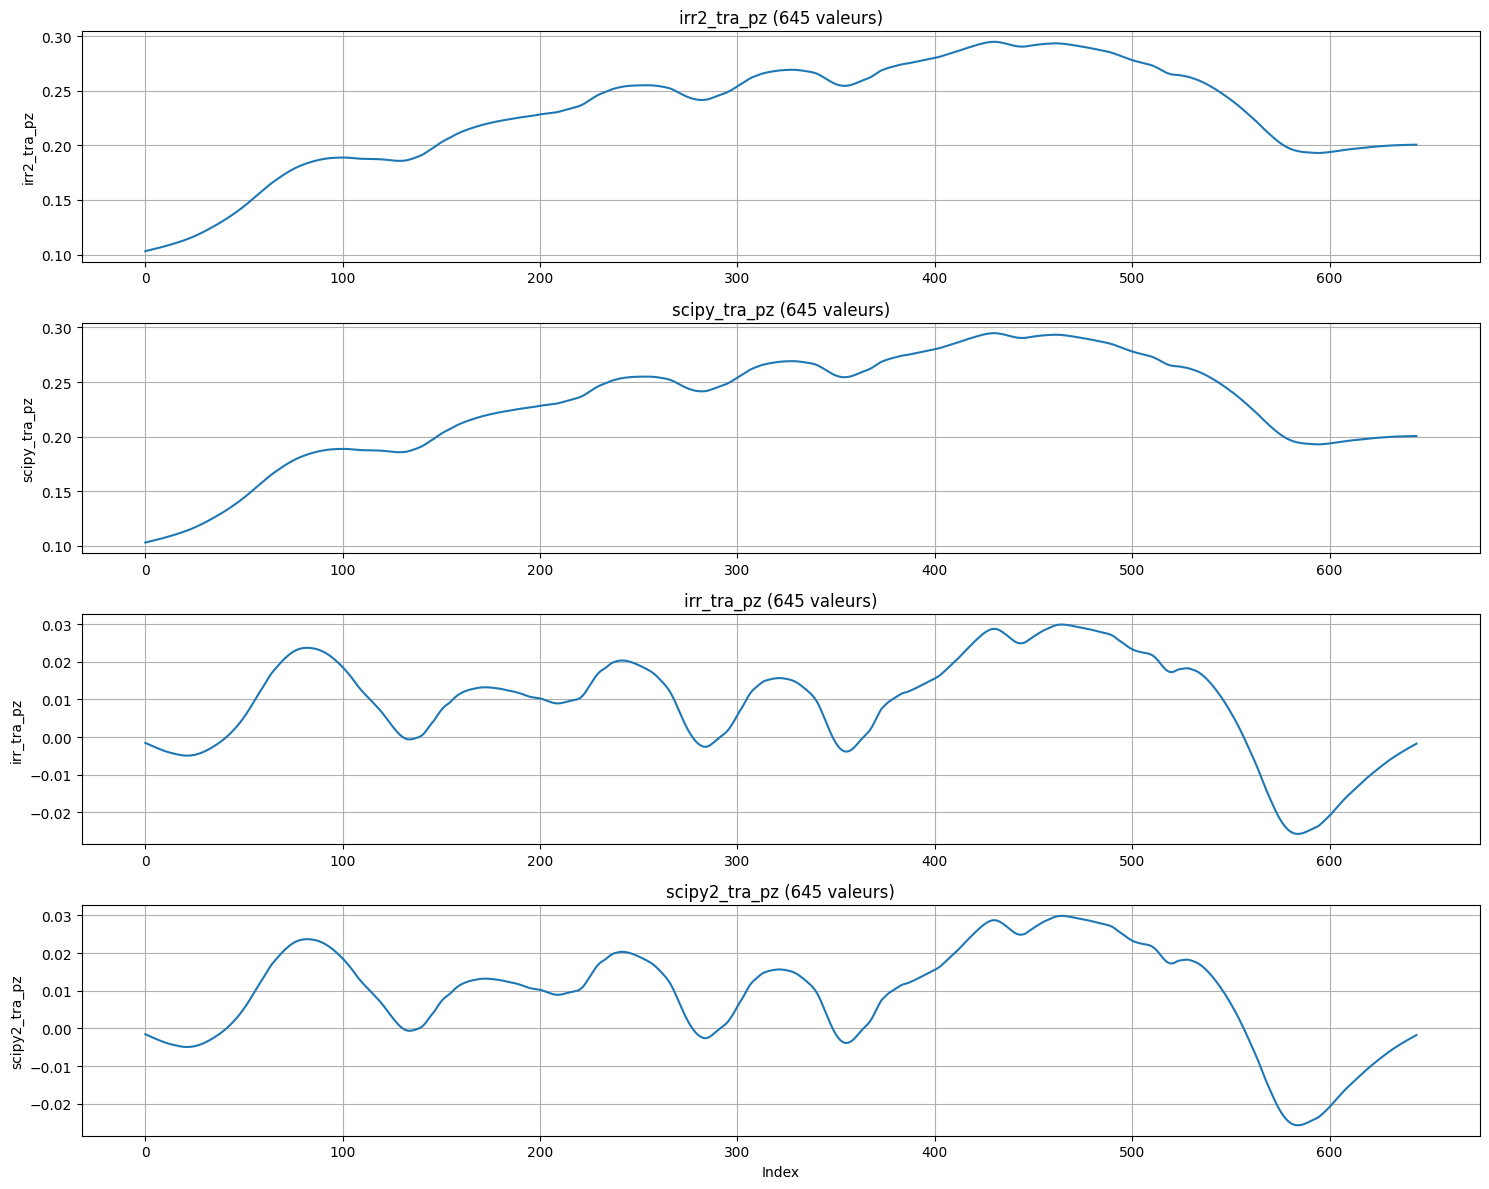

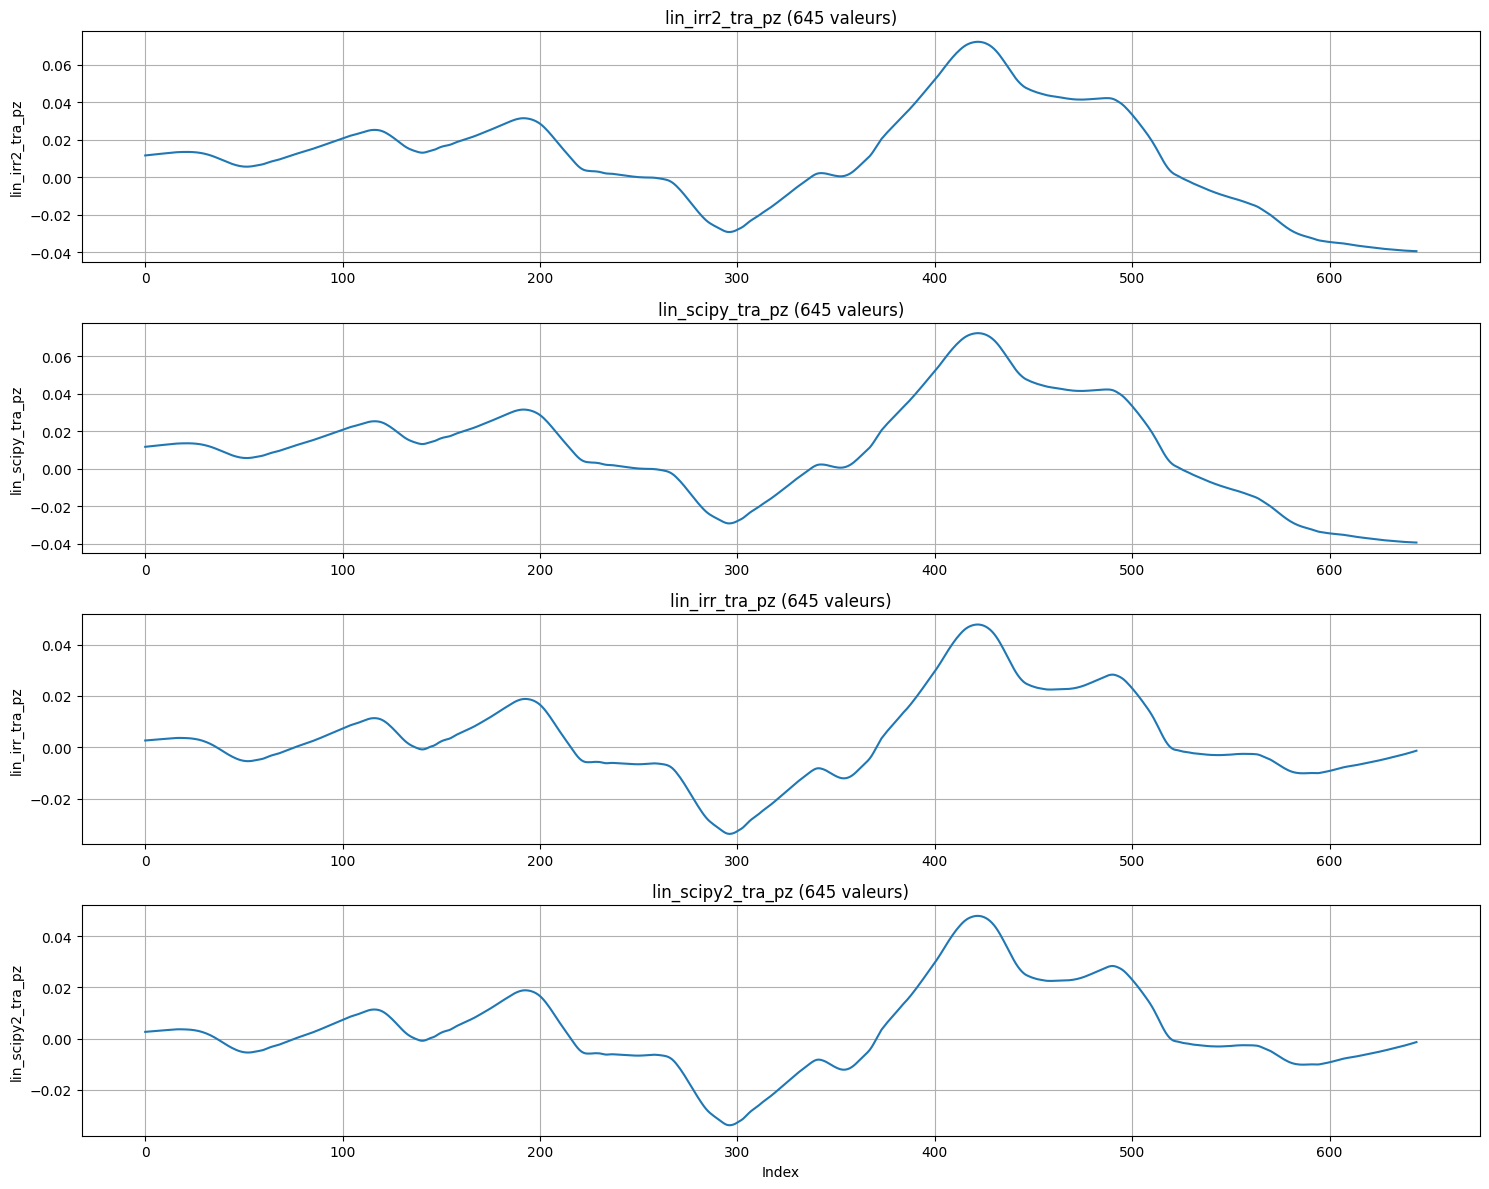

In [85]:
#px:
draw_data4(scipy_tra_px, irr_tra_px, scipy2_tra_px, irr2_tra_px, start=s, end=e, label_x='scipy_tra_px', label_y='irr_tra_px', label_z='scipy2_tra_px', label_w='irr2_tra_px')
draw_data4(lin_scipy_tra_px, lin_irr_tra_px, lin_scipy2_tra_px, lin_irr2_tra_px, start=s, end=e, label_x='lin_scipy_tra_px', label_y='lin_irr_tra_px', label_z='lin_scipy2_tra_px', label_w='lin_irr2_tra_px')
#py:
draw_data4(scipy_tra_py, irr_tra_py, scipy2_tra_py, irr2_tra_py, start=s, end=e, label_x='scipy_tra_py', label_y='irr_tra_py', label_z='scipy2_tra_py', label_w='irr2_tra_py')
draw_data4(lin_scipy_tra_py, lin_irr_tra_py, lin_scipy2_tra_py, lin_irr2_tra_py, start=s, end=e, label_x='lin_scipy_tra_py', label_y='lin_irr_tra_py', label_z='lin_scipy2_tra_py', label_w='lin_irr2_tra_py')
#pz:
draw_data4(scipy_tra_pz, irr_tra_pz, scipy2_tra_pz, irr2_tra_pz, start=s, end=e, label_x='scipy_tra_pz', label_y='irr_tra_pz', label_z='scipy2_tra_pz', label_w='irr2_tra_pz')
draw_data4(lin_scipy_tra_pz, lin_irr_tra_pz, lin_scipy2_tra_pz, lin_irr2_tra_pz, start=s, end=e, label_x='lin_scipy_tra_pz', label_y='lin_irr_tra_pz', label_z='lin_scipy2_tra_pz', label_w='lin_irr2_tra_pz')